# Tutorial 9b - Crystal properties of lithium niobate

Continuing the study of bulk material elastic properties from the previous tutorial, let's take a look at the orientational dependence of lithium niobate, an increasingly important material in SBS.

The numerical values for the $\mathrm{LiNbO}_3$ material properties  are taken from [Rodrigues et al, JOSA B 40, D56 (2023)](https://doi.org//10.1364/JOSAB.482656).


In [ ]:
%load_ext autoreload
%autoreload 3

import sys
import numpy as np
from IPython.display import Image, display

sys.path.append("../backend")
import materials

## Stiffness tensor under crystal rotations



### The default orientation:  $y$-cut

To review, in NumBAT, the *laboratory* axes $x$, $y$ and $z$ are fixed. Propagation occurs along the $z$ direction and the vertical direction out of the substrate is along $y$.

The *crystal* axes of a material, denoted $X$, $Y$ and $Z$, or $\hat{c}_x$, $\hat{c}_y$, $\hat{c}_z$ can be rotated.

The material is defined in the definition json files with the crystal and laboratory axes aligned, and is thus in $y$-cut form: the crystal $Y$ axis points up out of the waveguide, with the crystal symmetry axis $Z$ lying along the propagation direction $z$.


In [2]:
mat_LiNbO3 = materials.make_material("LiNbO3_2023_Rodrigues")

Here is the default orientation as just described.


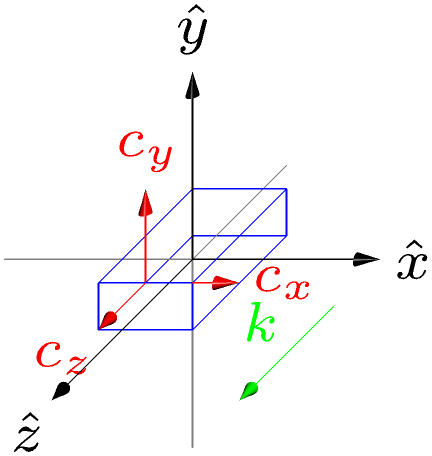

In [3]:
pref='tmp_LiNbO3_ycut'
fnimg = mat_LiNbO3.make_crystal_axes_plot(pref+'-ycut')
display(Image(fnimg, width=300))

The crystal properties show that for this orientation the two shear modes for propagation along $z$ are degenerate:

In [6]:
print(mat_LiNbO3.elastic_properties())

Elastic properties of material LiNbO3_2023_Rodrigues
  Density:        4650.000 kg/m^3
  Ref. index:     2.2100+0.0000j 
  Crystal class:  Trigonal
  Stiffness c_IJ:
 stiffness c, unit: GPa.    [[198.83   54.64   68.23    7.83    0.      0.   ]
     [ 54.64  198.83   68.23   -7.83    0.      0.   ]
     [ 68.23   68.23  235.71    0.      0.      0.   ]
     [  7.83   -7.83    0.     59.86    0.      0.   ]
     [  0.      0.      0.      0.     59.86    7.83 ]
     [  0.      0.      0.      0.      7.83   72.095]]

  Wave mode 1: v_p=7.1197 km/s,  |v_g|=7.1197 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  7.1197] km/s
  Wave mode 2: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.0000  0.4693  3.5879] km/s
  Wave mode 3: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[ 0.0000 -0.4693  3.5879] km/s


This is not true if the wave vector direction in the $x$-$z$ plane is varied.

By solving the Christoffel equation as the wave vector rotates in the $x$-$z$ plane we can map out curves of the phase velocity, inverse phase velocity (or "slowness"), and the magnitude of the group velocity $|v_g(\kappa)|$.

The faint circular lines mark radial velocities at 1 km/s intervals.


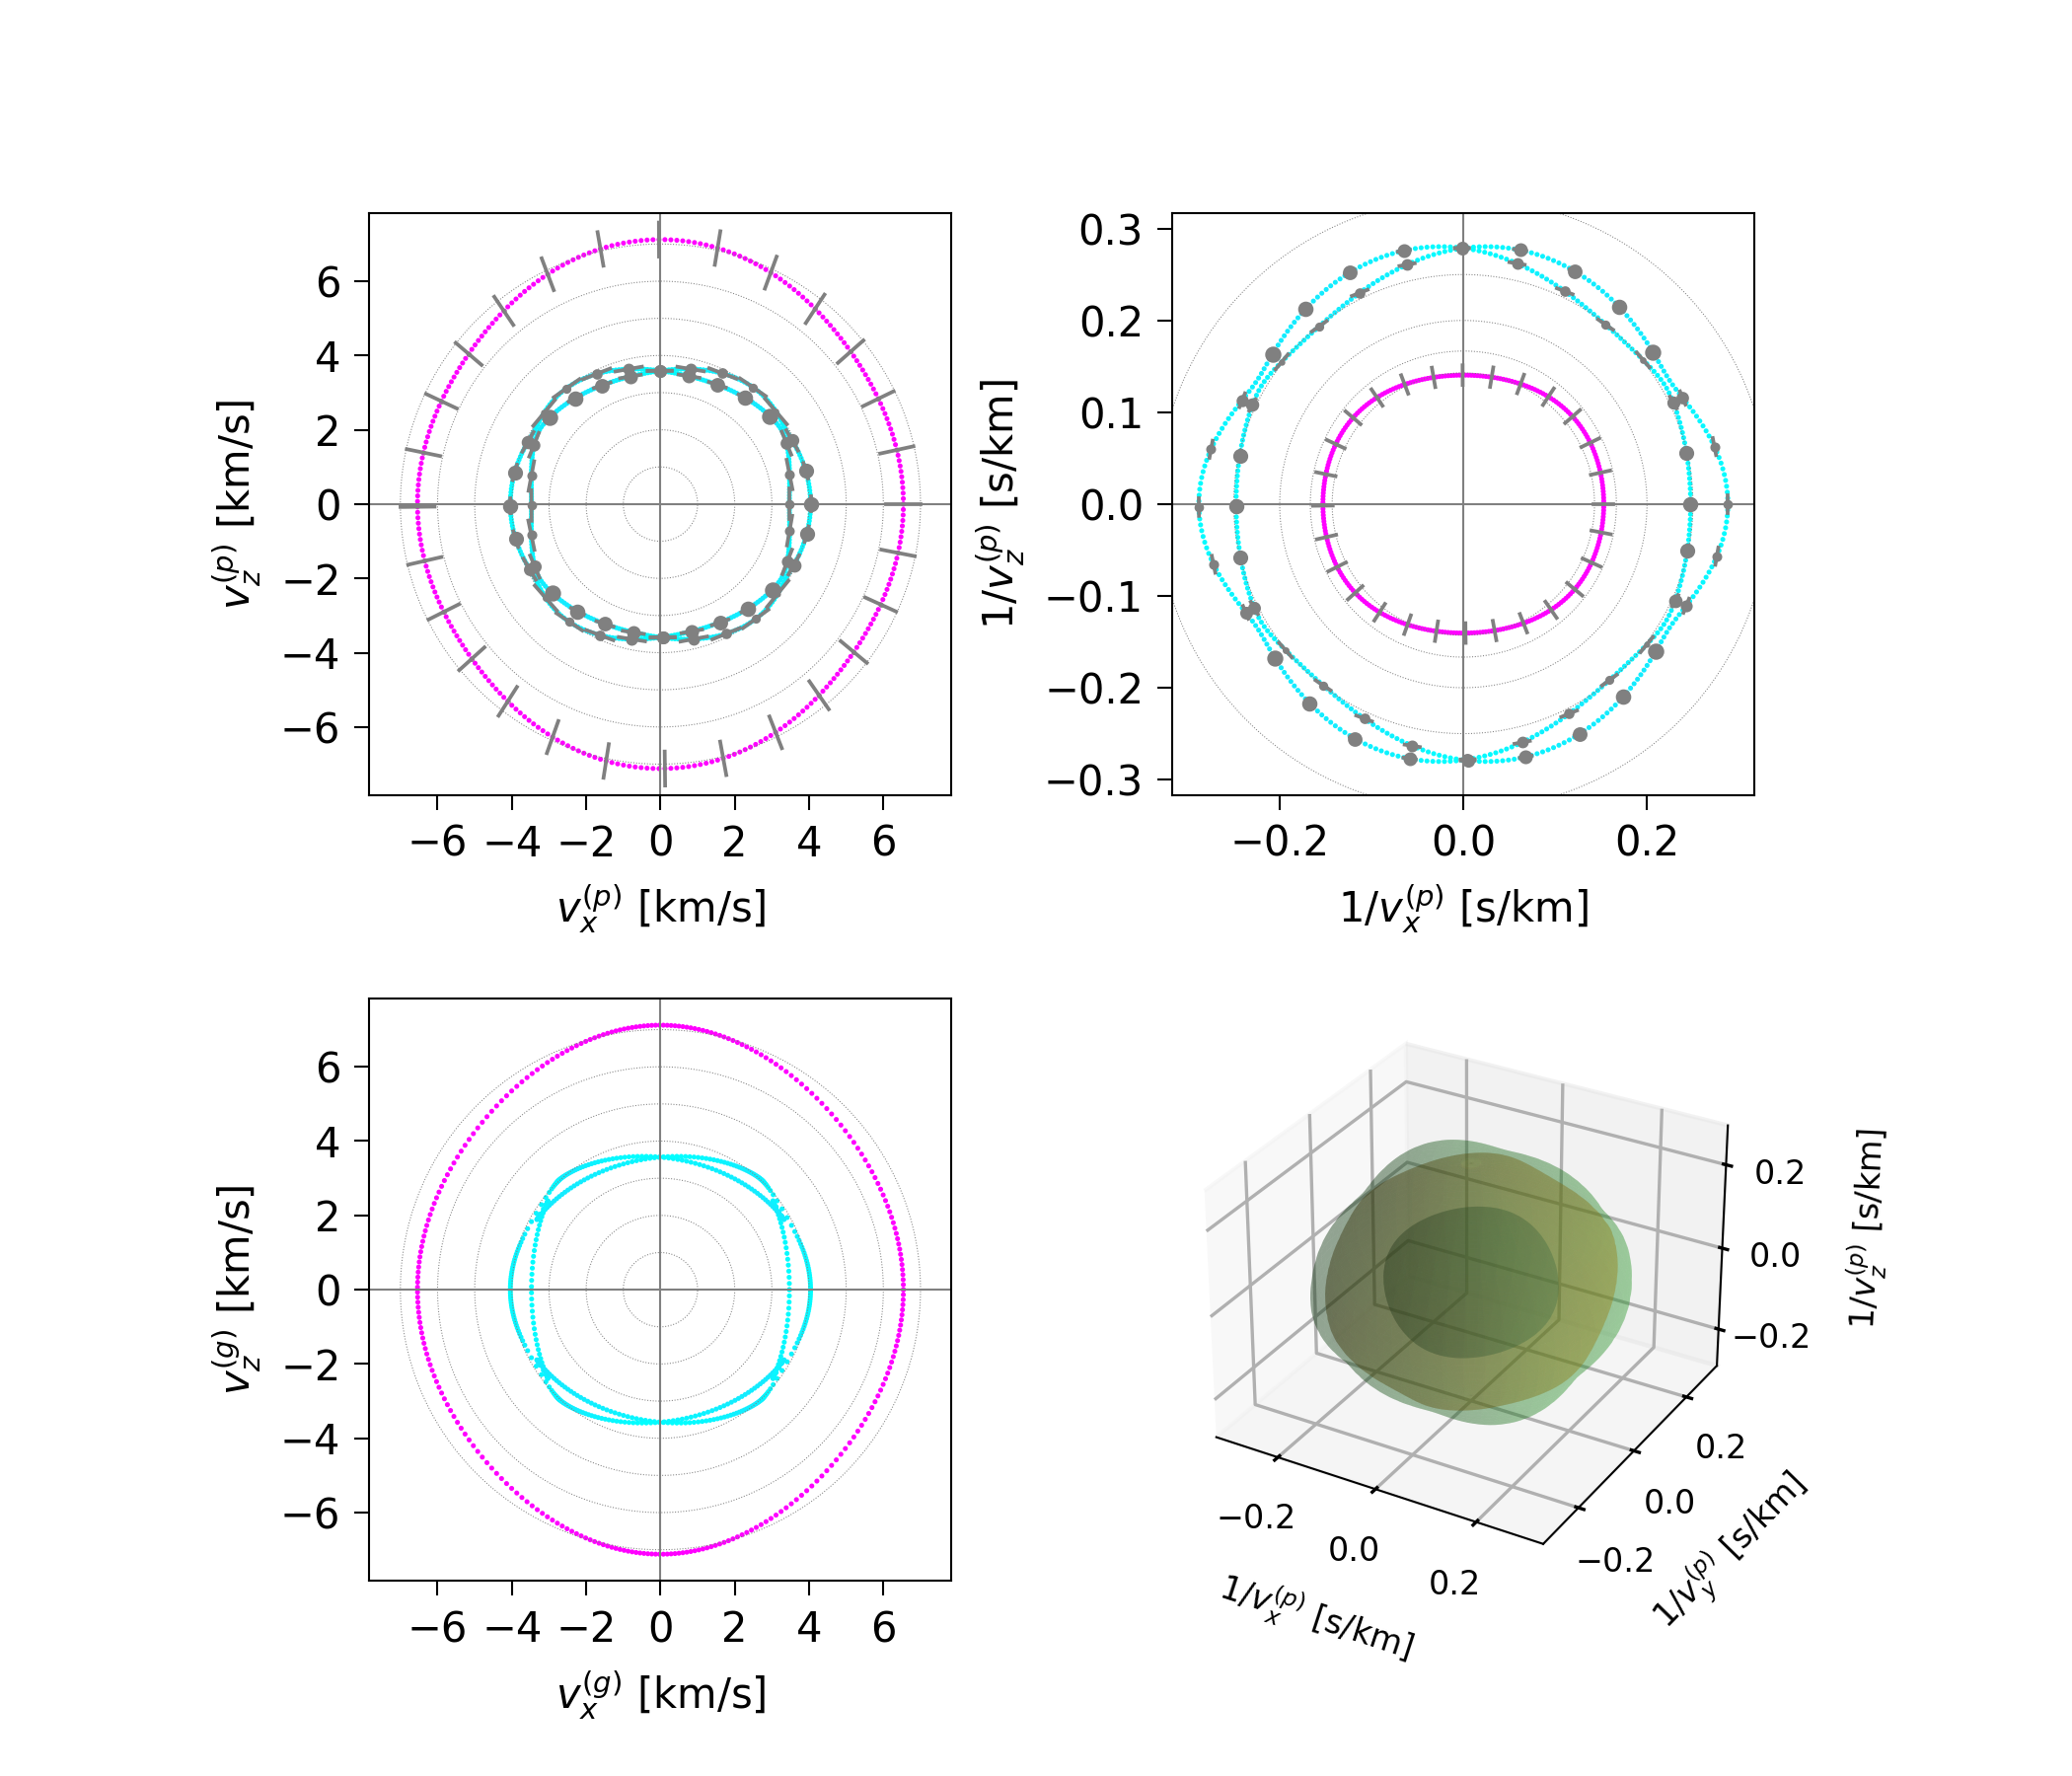

In [4]:
fnimg = mat_LiNbO3.plot_bulk_dispersion(pref)
display(Image(fnimg,width=600))

For this material, it is quite hard to see the difference between the phase and group velocity plots. That is more obvious in some other materials.

These plots can also be generated without the polarisation state markers:

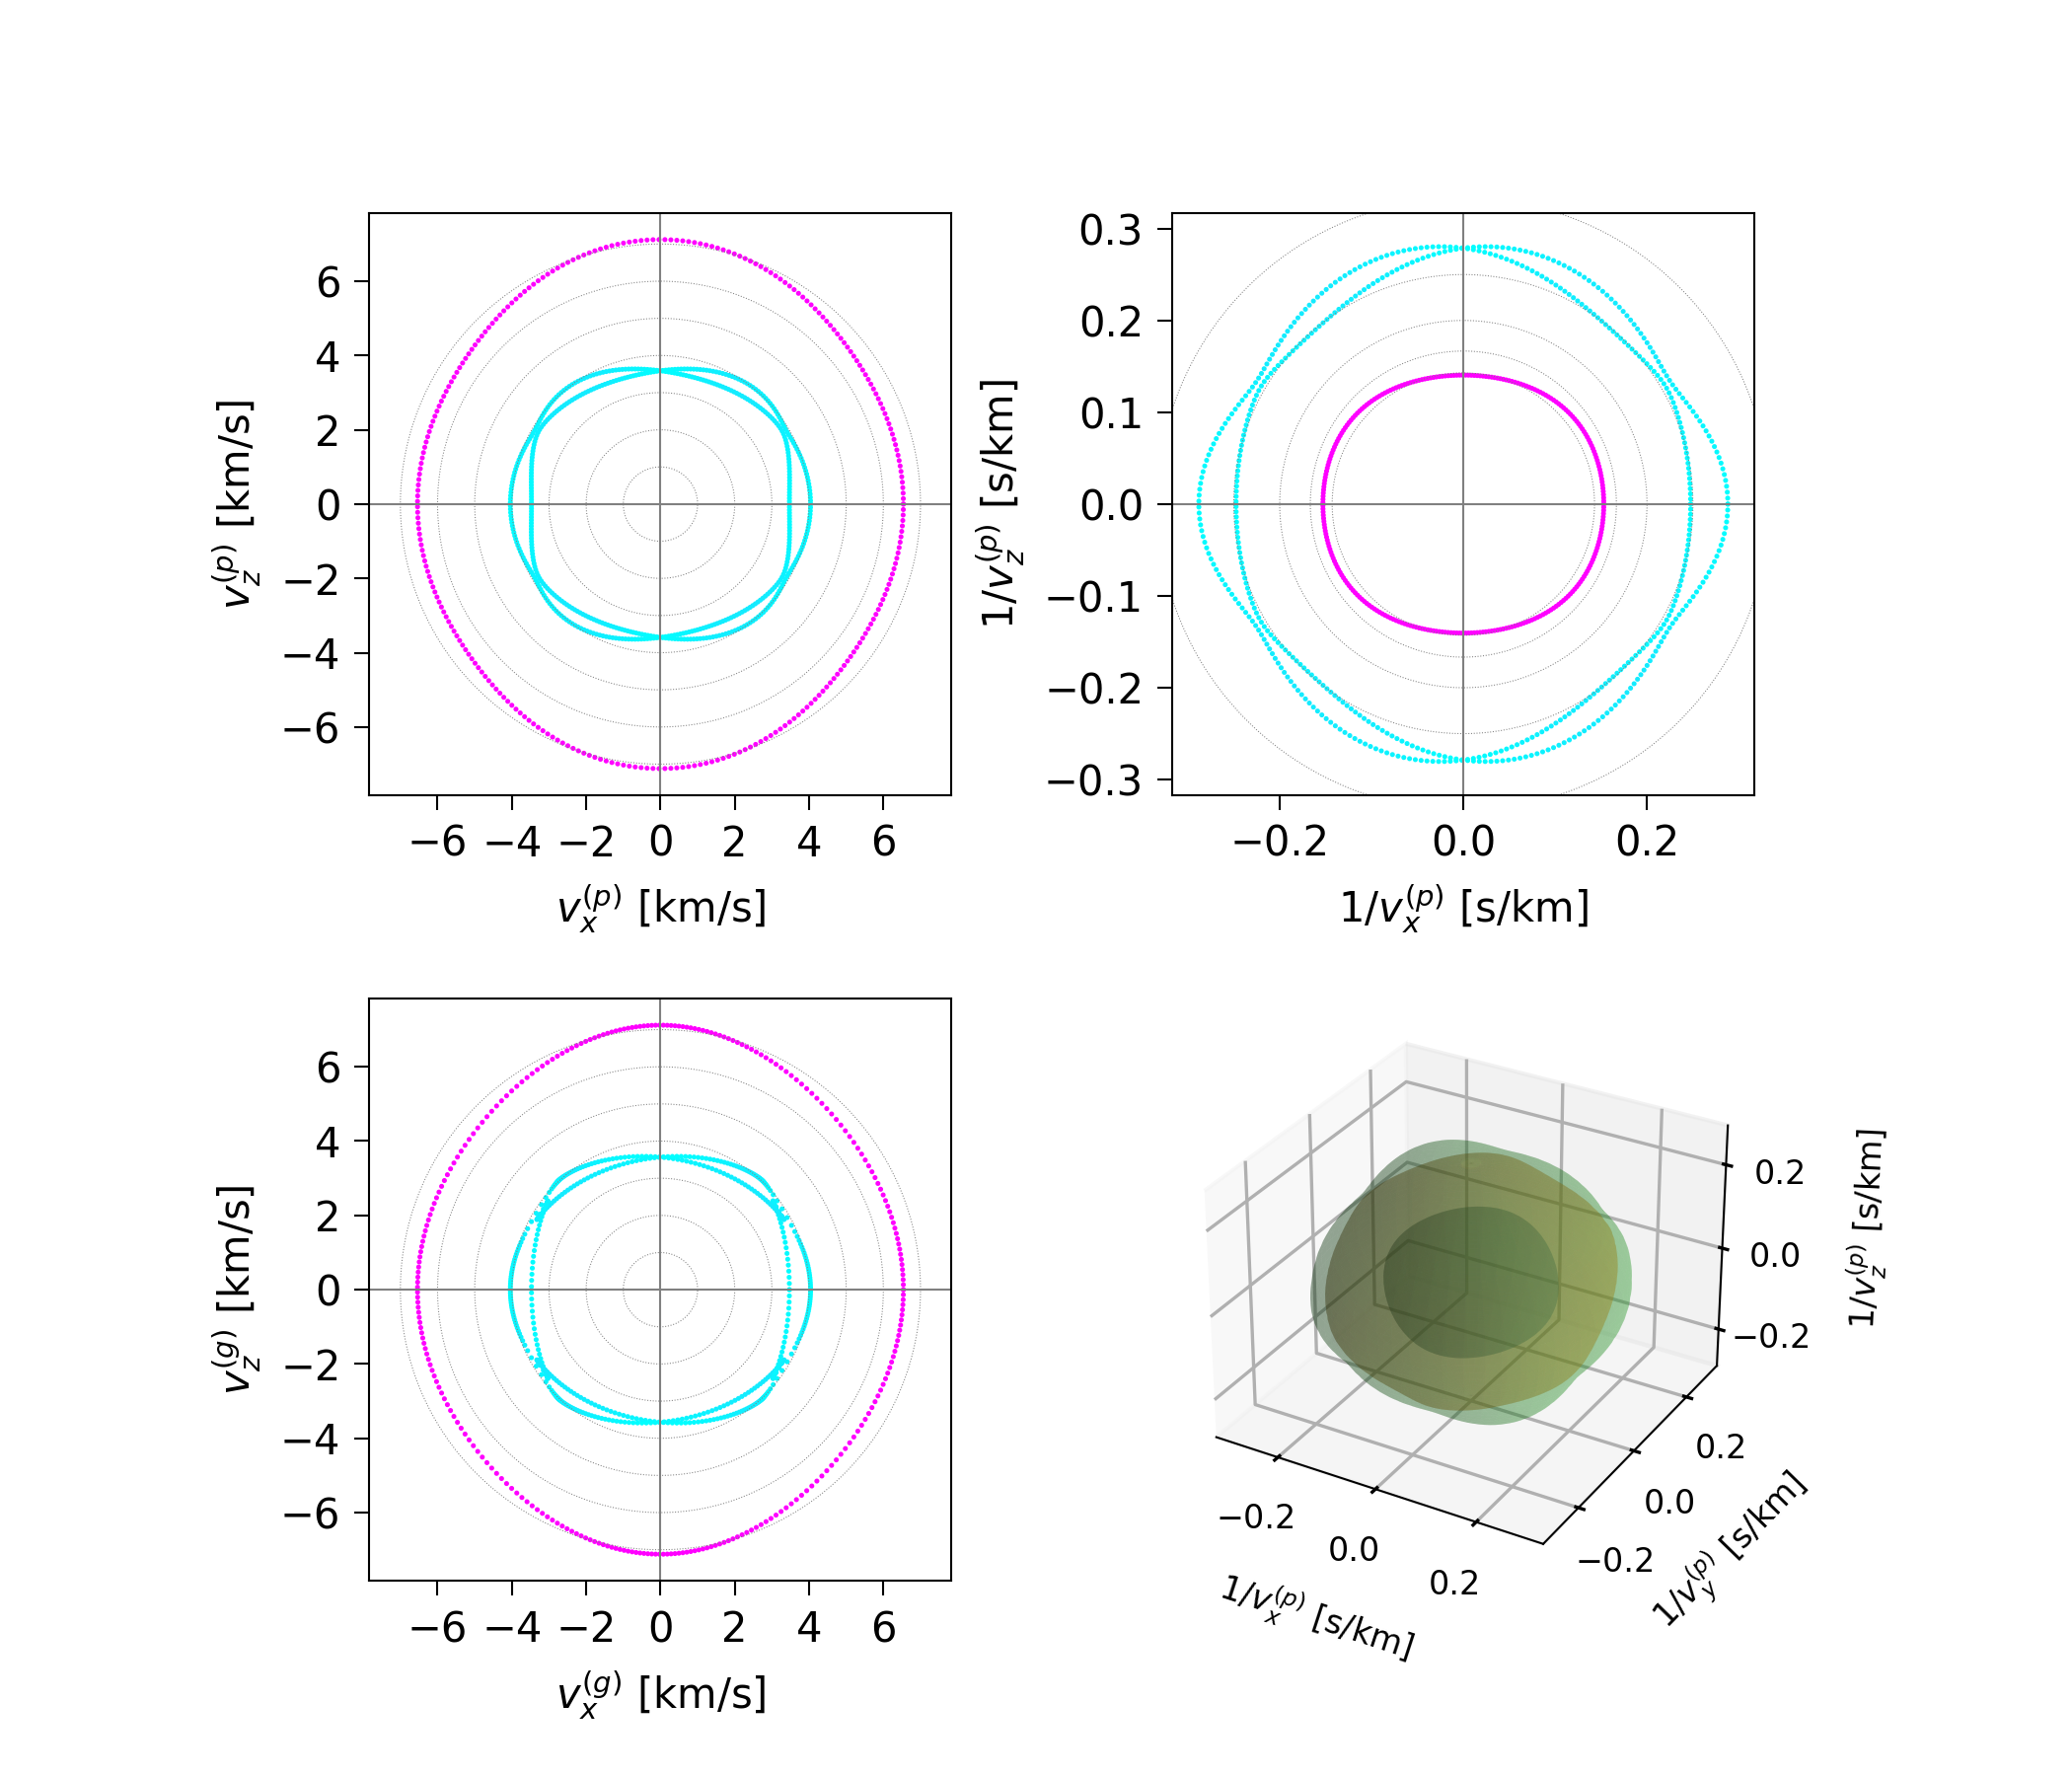

In [5]:
fnimg = mat_LiNbO3.plot_bulk_dispersion(pref, show_poln=False)
display(Image(fnimg,width=600))

### The $z$-cut orientation

We now rotate the starting crystal so the primary symmetry axis $Z$ points up along $y$, with the $-Y$ axis along $z$. This corresponds to Fig. 2a in Rodrigues et al.

In [7]:
pref='tmp_LiNbO3_zcut'
mat_LiNbO3_z = mat_LiNbO3.copy()
mat_LiNbO3_z.set_orientation('z-cut')

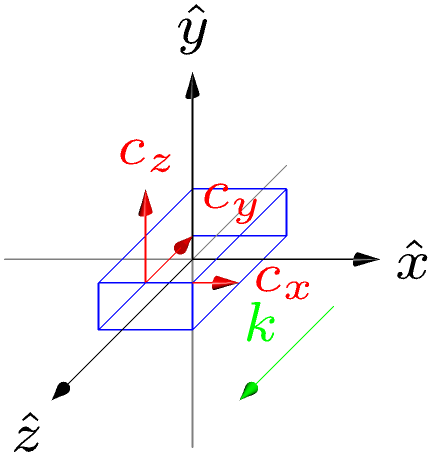

In [8]:
fimg = mat_LiNbO3_z.make_crystal_axes_plot(pref+'-zcut')
display(Image(fimg, width=300))

With the 6-fold symmetry axis $Z$ pointing up along $y$, the dispersion cuts in the $x$-$z$ plane now display the full 6-fold symmetry.

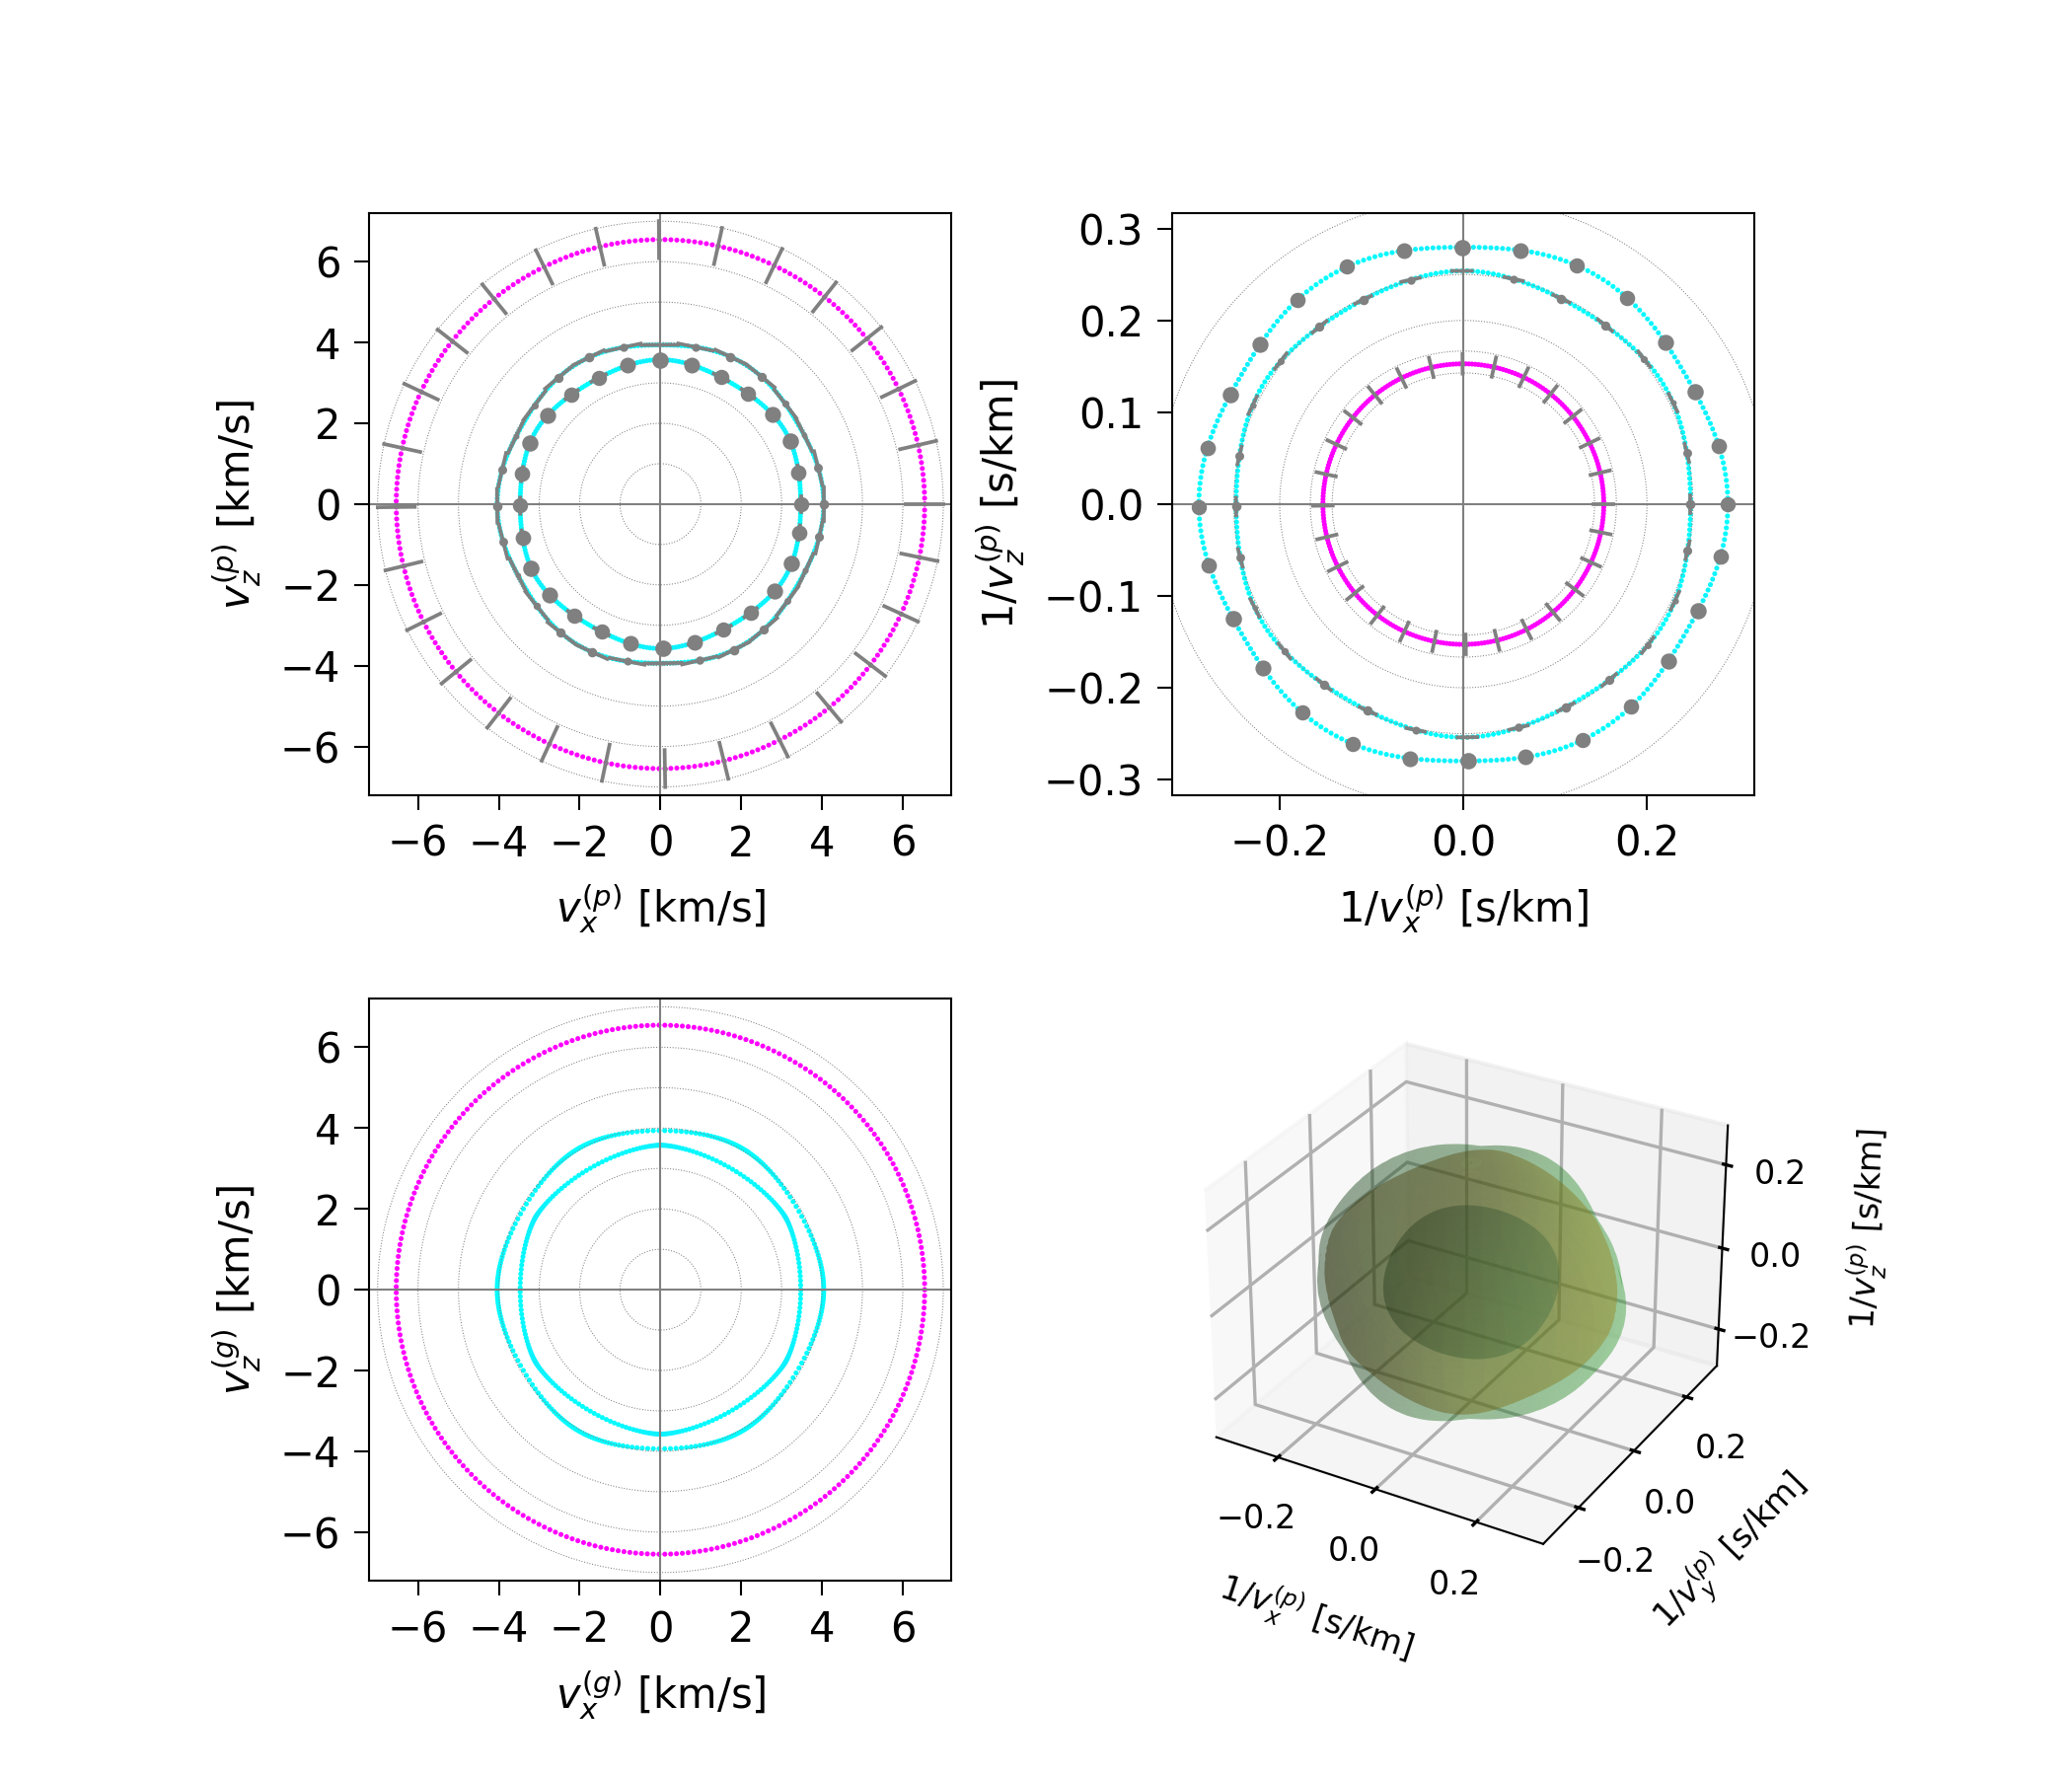

In [9]:
fnimg = mat_LiNbO3_z.plot_bulk_dispersion(pref)
display(Image(fnimg,width=600))

### The $x$-cut orientation

In [10]:
pref='tmp_LiNbO3_xcut'

mat_LiNbO3_x =  mat_LiNbO3.copy()
mat_LiNbO3_x.set_orientation('x-cut')

print(mat_LiNbO3_x.elastic_properties())

Elastic properties of material LiNbO3_2023_Rodrigues
  Density:        4650.000 kg/m^3
  Ref. index:     2.2100+0.0000j 
  Crystal class:  Trigonal
  Stiffness c_IJ:
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 1.9883e+02  5.4640e+01  6.8230e+01 -1.4383e-15  7.8300e+00  0.0000e+00]
     [ 5.4640e+01  1.9883e+02  6.8230e+01  1.4383e-15 -7.8300e+00 -1.6552e-47]
     [ 6.8230e+01  6.8230e+01  2.3571e+02  0.0000e+00  0.0000e+00  0.0000e+00]
     [-1.4383e-15  1.4383e-15  0.0000e+00  5.9860e+01  0.0000e+00 -7.8300e+00]
     [ 7.8300e+00 -7.8300e+00  0.0000e+00  0.0000e+00  5.9860e+01 -1.4383e-15]
     [ 0.0000e+00 -4.2352e-31  0.0000e+00 -7.8300e+00 -1.4383e-15  7.2095e+01]]

  Wave mode 1: v_p=7.1197 km/s,  |v_g|=7.1197 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  7.1197] km/s
  Wave mode 2: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.4693 -0.0000  3.5879] km/s
  Wave mode 3: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 0.0000  1.00

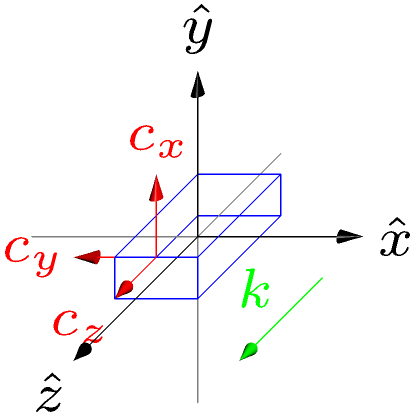

In [11]:
fnimg = mat_LiNbO3_x.make_crystal_axes_plot(pref+'-xcut')
display(Image(fnimg,width=300))

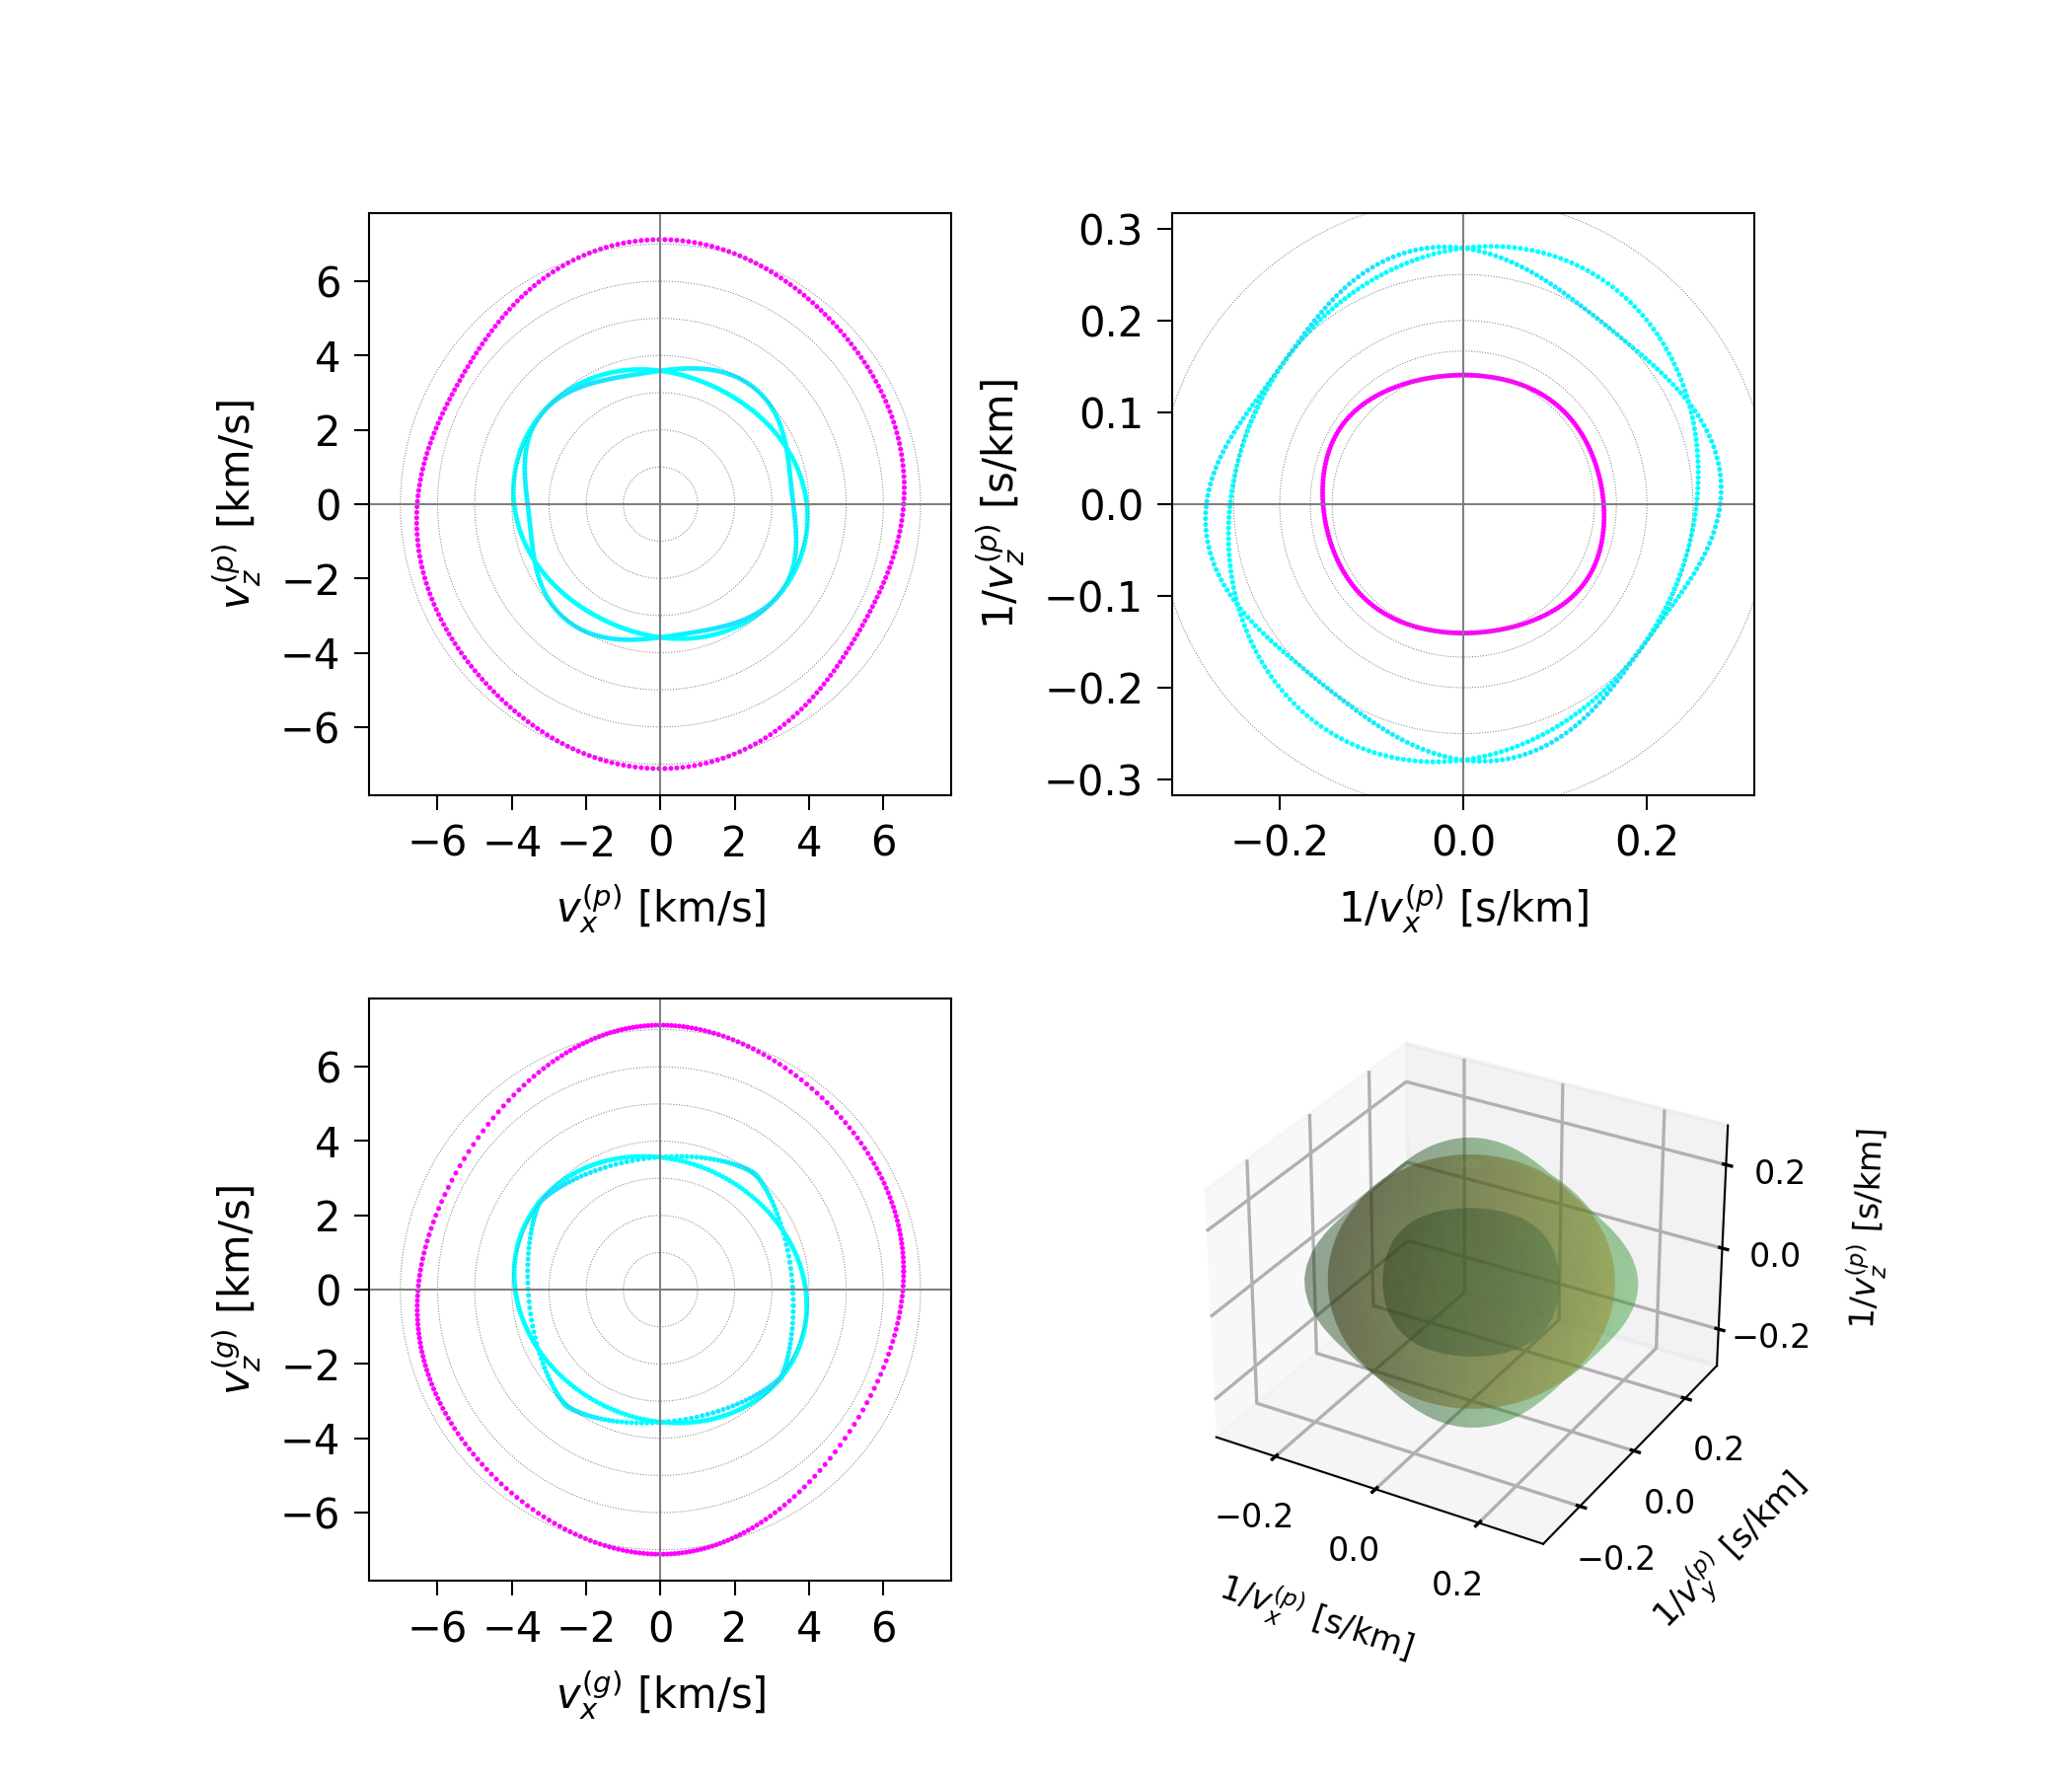

In [12]:
fnimg = mat_LiNbO3_x.plot_bulk_dispersion(pref, show_poln=False)
display(Image(fnimg,width=600))


## Photoelastic response

Now let's consider the influence of crystal orientation on the optoelastic coupling.

The photoelastic tensor elements also change in value as the crystal is rotated. 
Once again, we can plot the coefficients in the lab frame coordinates, as a crystal of given orientation is rotated around the $y$ axis.

As with the results above, the $Z$-cut crystal exhibits the 3-fold trigonal symmetry, while the other two cuts have more complex behaviour.

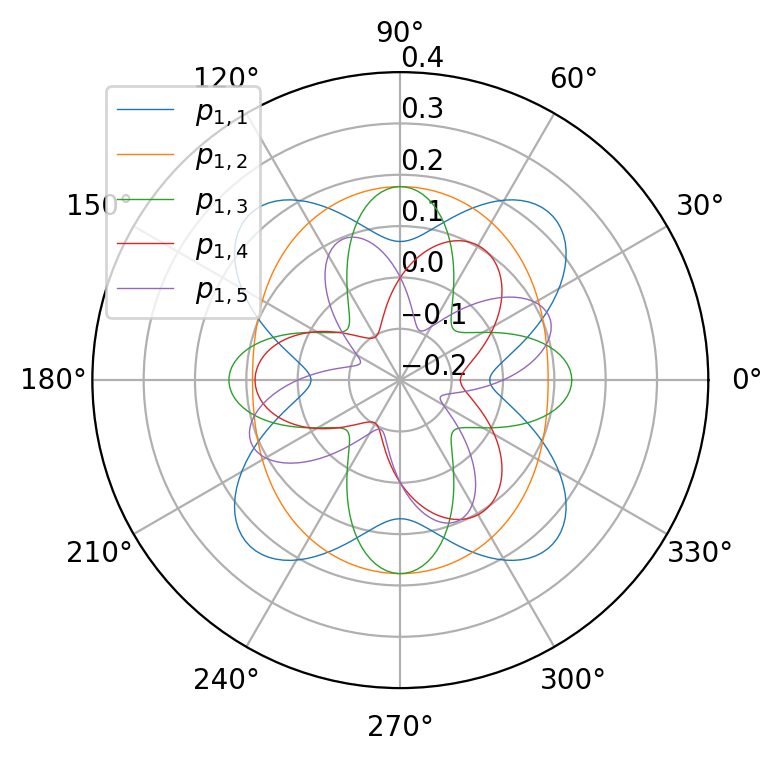

In [13]:
mat_LiNbO3.plot_photoelastic_IJ(pref, ("11","12", "13", "14", "15"))

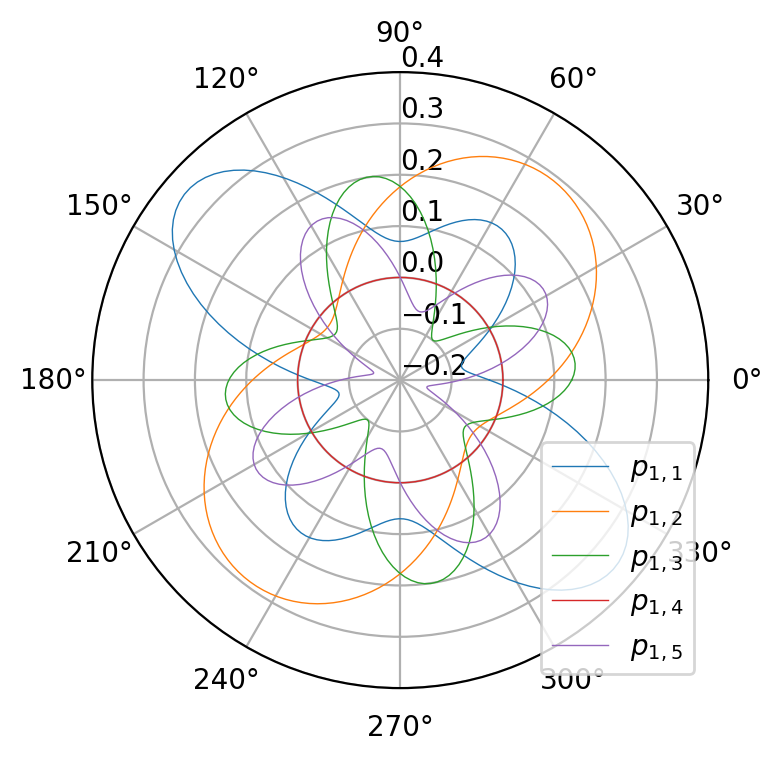

In [106]:
mat_LiNbO3_x.plot_photoelastic_IJ(pref, ("11","12", "13", "14", "15"))

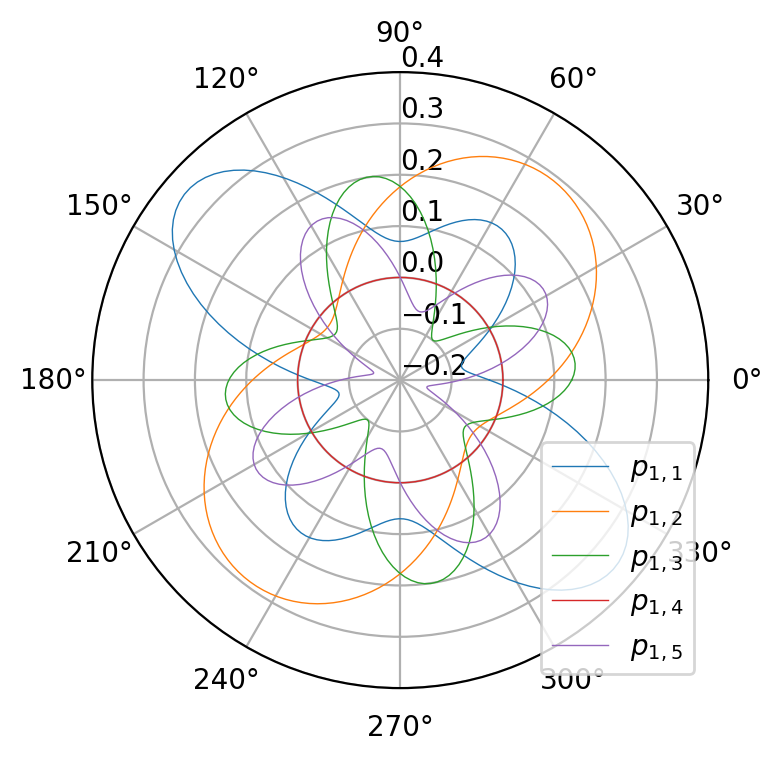

In [ ]:
mat_LiNbO3_x.plot_photoelastic_IJ(pref, ("11","12", "13", "14", "15"))

# Piezolectric properties of lithium niobate

Now let's turn to the piezoelectric response of lithium niobate.



In [ ]:
import materials
mat_LiNbO3 = materials.make_material("LiNbO3aniso_2021_Steel")


Material: LiNbO3aniso
  File: LiNbO3aniso_2021_Steel
  Source: Steel
  Date: 2021
  Crystal class:  Trigonal
  Crystal group:  no sym

 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[199.2   54.7   70.     7.9    0.     0.  ]
     [ 54.7  199.2   70.    -7.9    0.     0.  ]
     [ 70.    70.   240.     0.     0.     0.  ]
     [  7.9   -7.9    0.    59.9    0.     0.  ]
     [  0.     0.     0.     0.    59.9    7.9 ]
     [  0.     0.     0.     0.     7.9   72.25]]

 Viscosity eta_IJ., unit: dimensionless.
   Voigt 4-tensor:
    [[ 6.547e-04  2.275e-04  2.499e-04 -6.870e-05  0.000e+00  0.000e+00]
     [ 2.275e-04  6.547e-04  2.499e-04  6.870e-05  0.000e+00  0.000e+00]
     [ 2.499e-04  2.499e-04  3.377e-04  0.000e+00  0.000e+00  0.000e+00]
     [-6.870e-05  6.870e-05  0.000e+00  1.765e-04  0.000e+00  0.000e+00]
     [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.765e-04 -6.870e-05]
     [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -6.870e-05  2.136e-04]]

 Photoelasticity p_IJ.

## Piezo slowness curves for x-cut

Piezo effects lead to a "piezo-stiffening" of the stiffness tensor (a confusing terminology).
This is discussed in Auld volume 1, section 8.F.

We can look at this for different crystal cuts.

We use the negative $x$-axis cut (180 $^\circ$ rotation around the $x$-axis from $x$-cut) to match the parameters of Auld.

In [165]:
mat_LiNbO3 = materials.make_material("LiNbO3_1973_Auld")
#mat_LiNbO3 = materials.make_material("LiNbO3aniso_2021_Steel")

mat_LiNbO3_x = mat_LiNbO3.copy()
mat_LiNbO3_x.set_orientation('x-cut')
mat_LiNbO3_negx = mat_LiNbO3.copy()
mat_LiNbO3_negx.set_orientation('negx-cut')


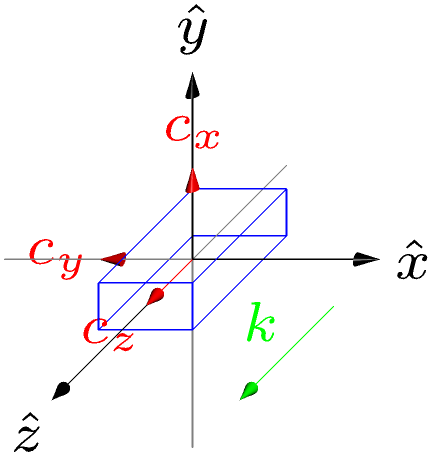

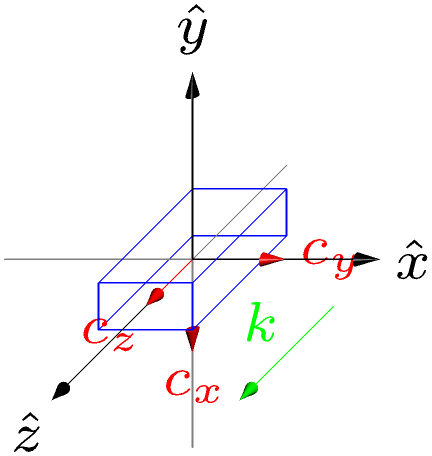

In [166]:
fimg1 = mat_LiNbO3_x.make_crystal_axes_plot('ttx')
fimg2 = mat_LiNbO3_negx.make_crystal_axes_plot('ttnegx')

display(Image(fimg1, width=300),Image(fimg2, width=300))


The slowness curve (top right) in the first plot with piezo effects disabled corresponds to Fig. 8.9 in Auld volume 1.

The slowness curve in the second plot with piezo effects enabled corresponds to Fig. 8.11 in Auld volume 1.


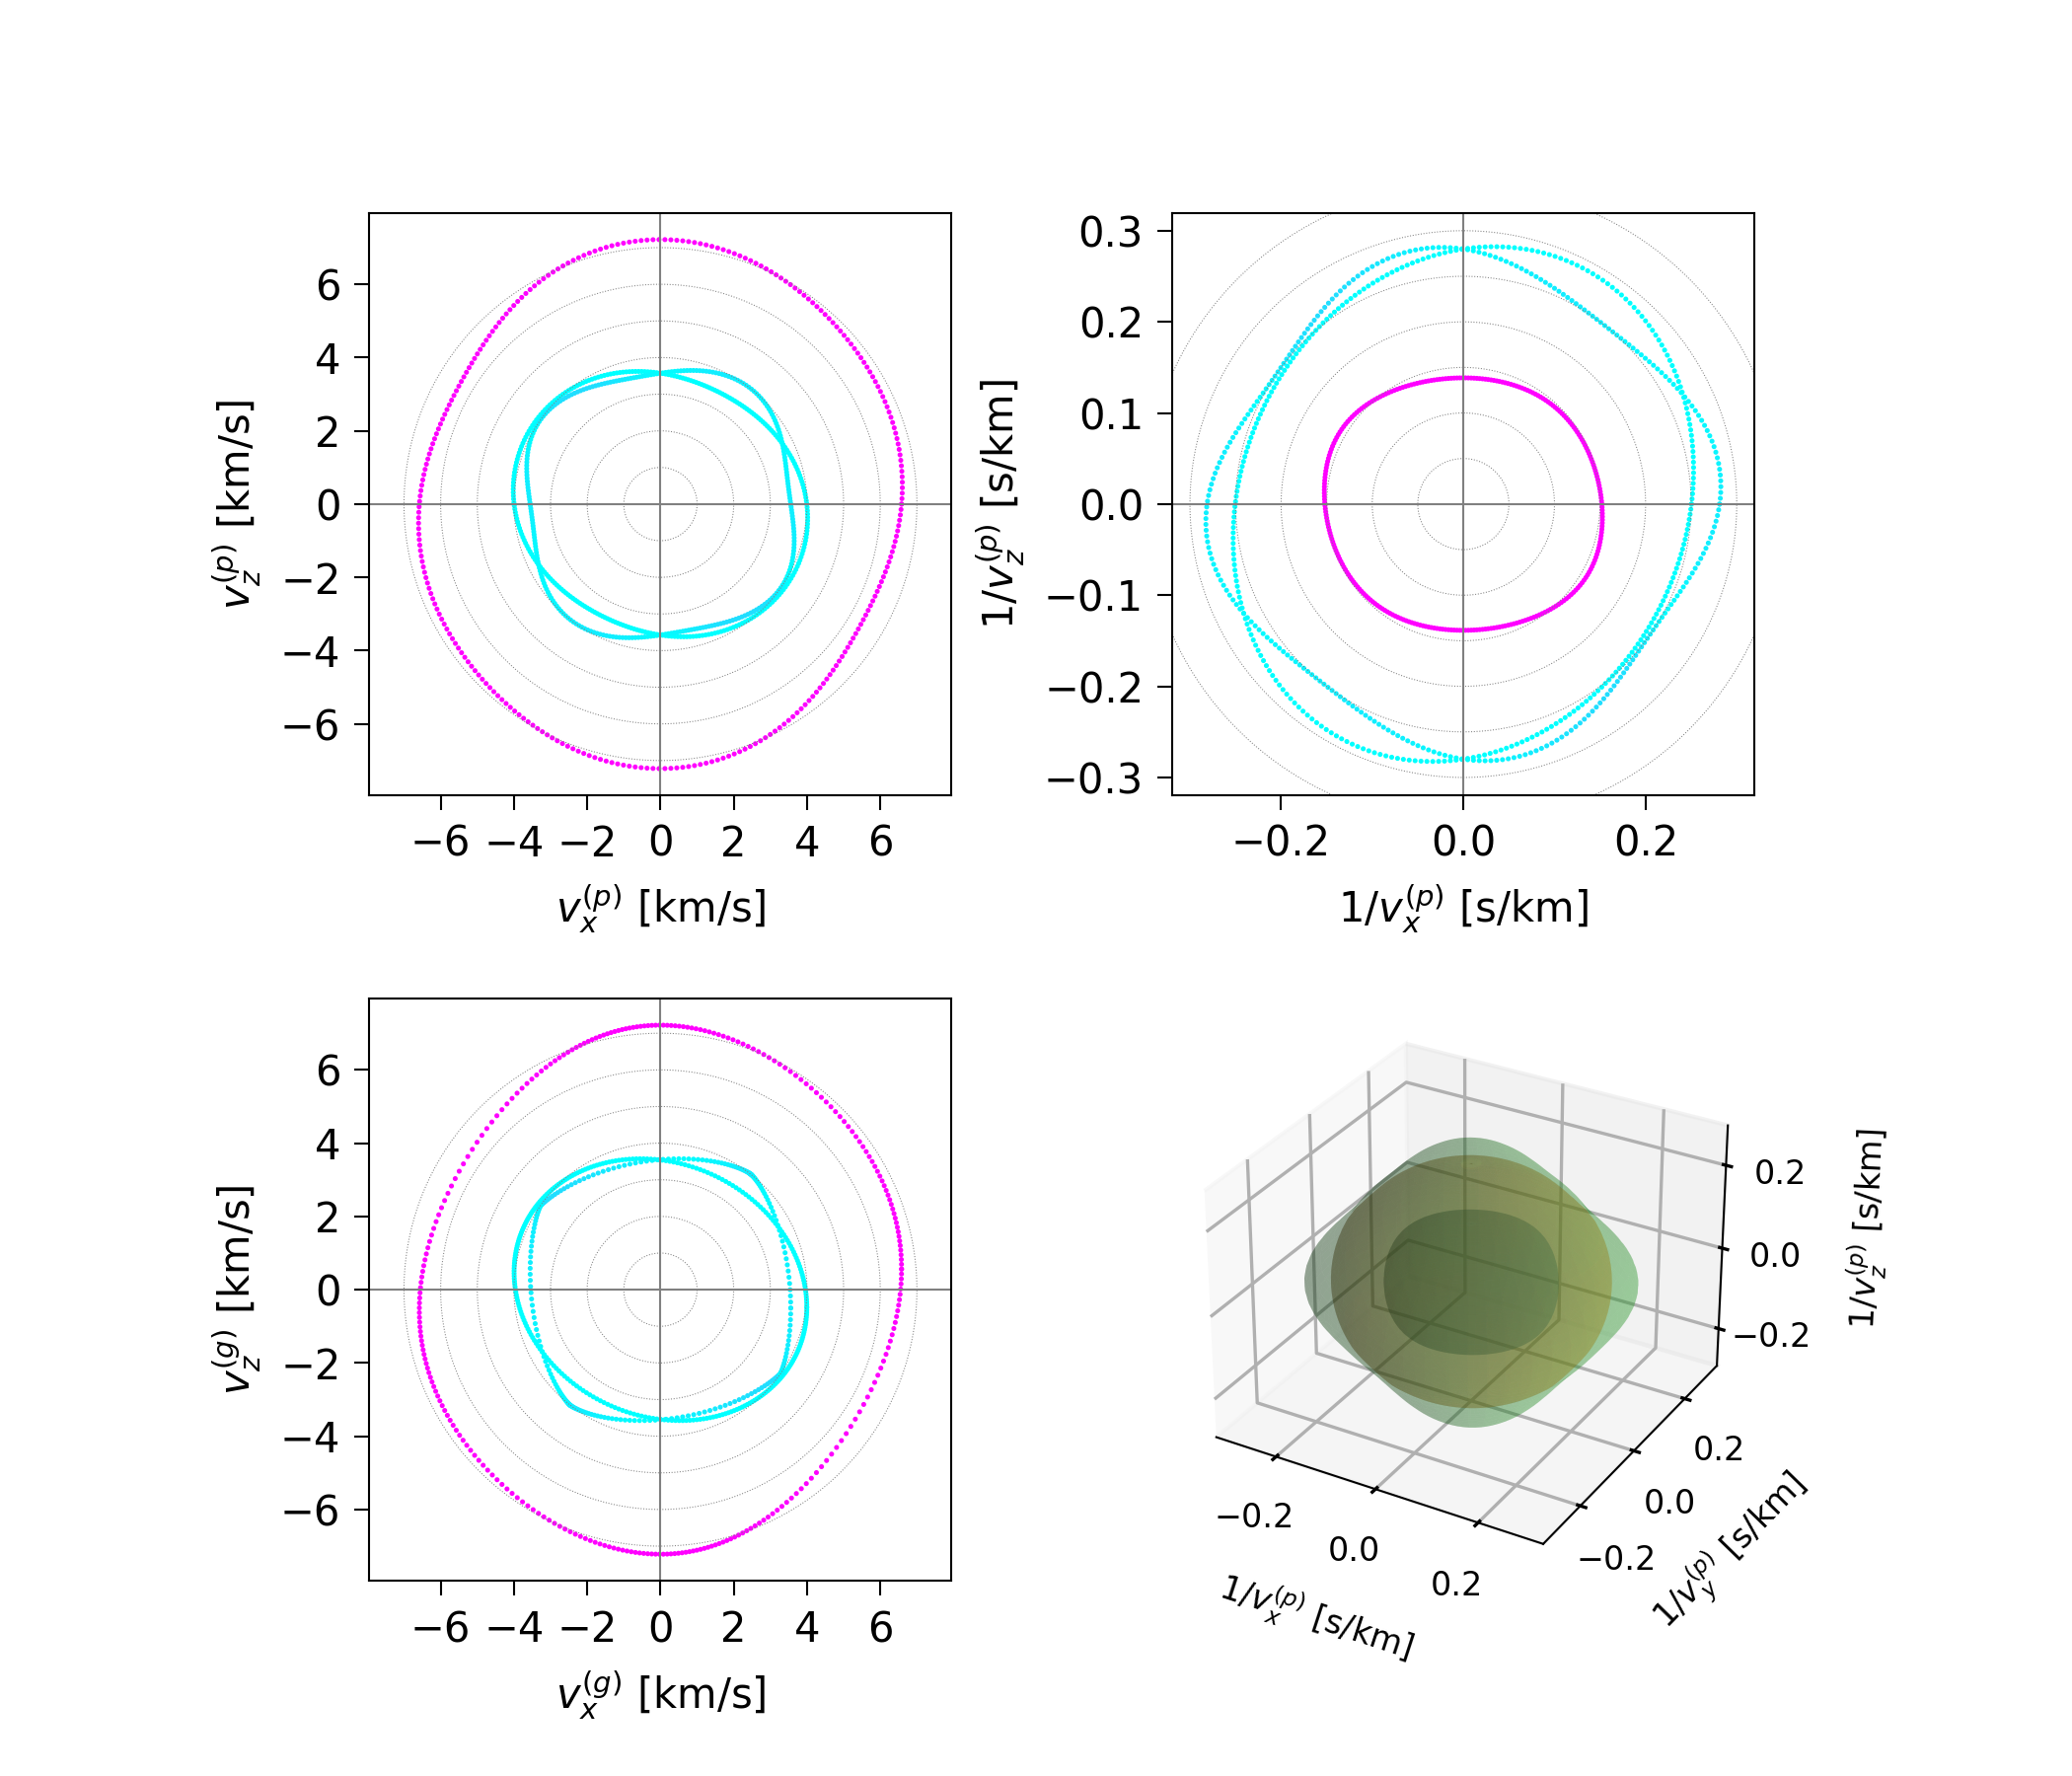

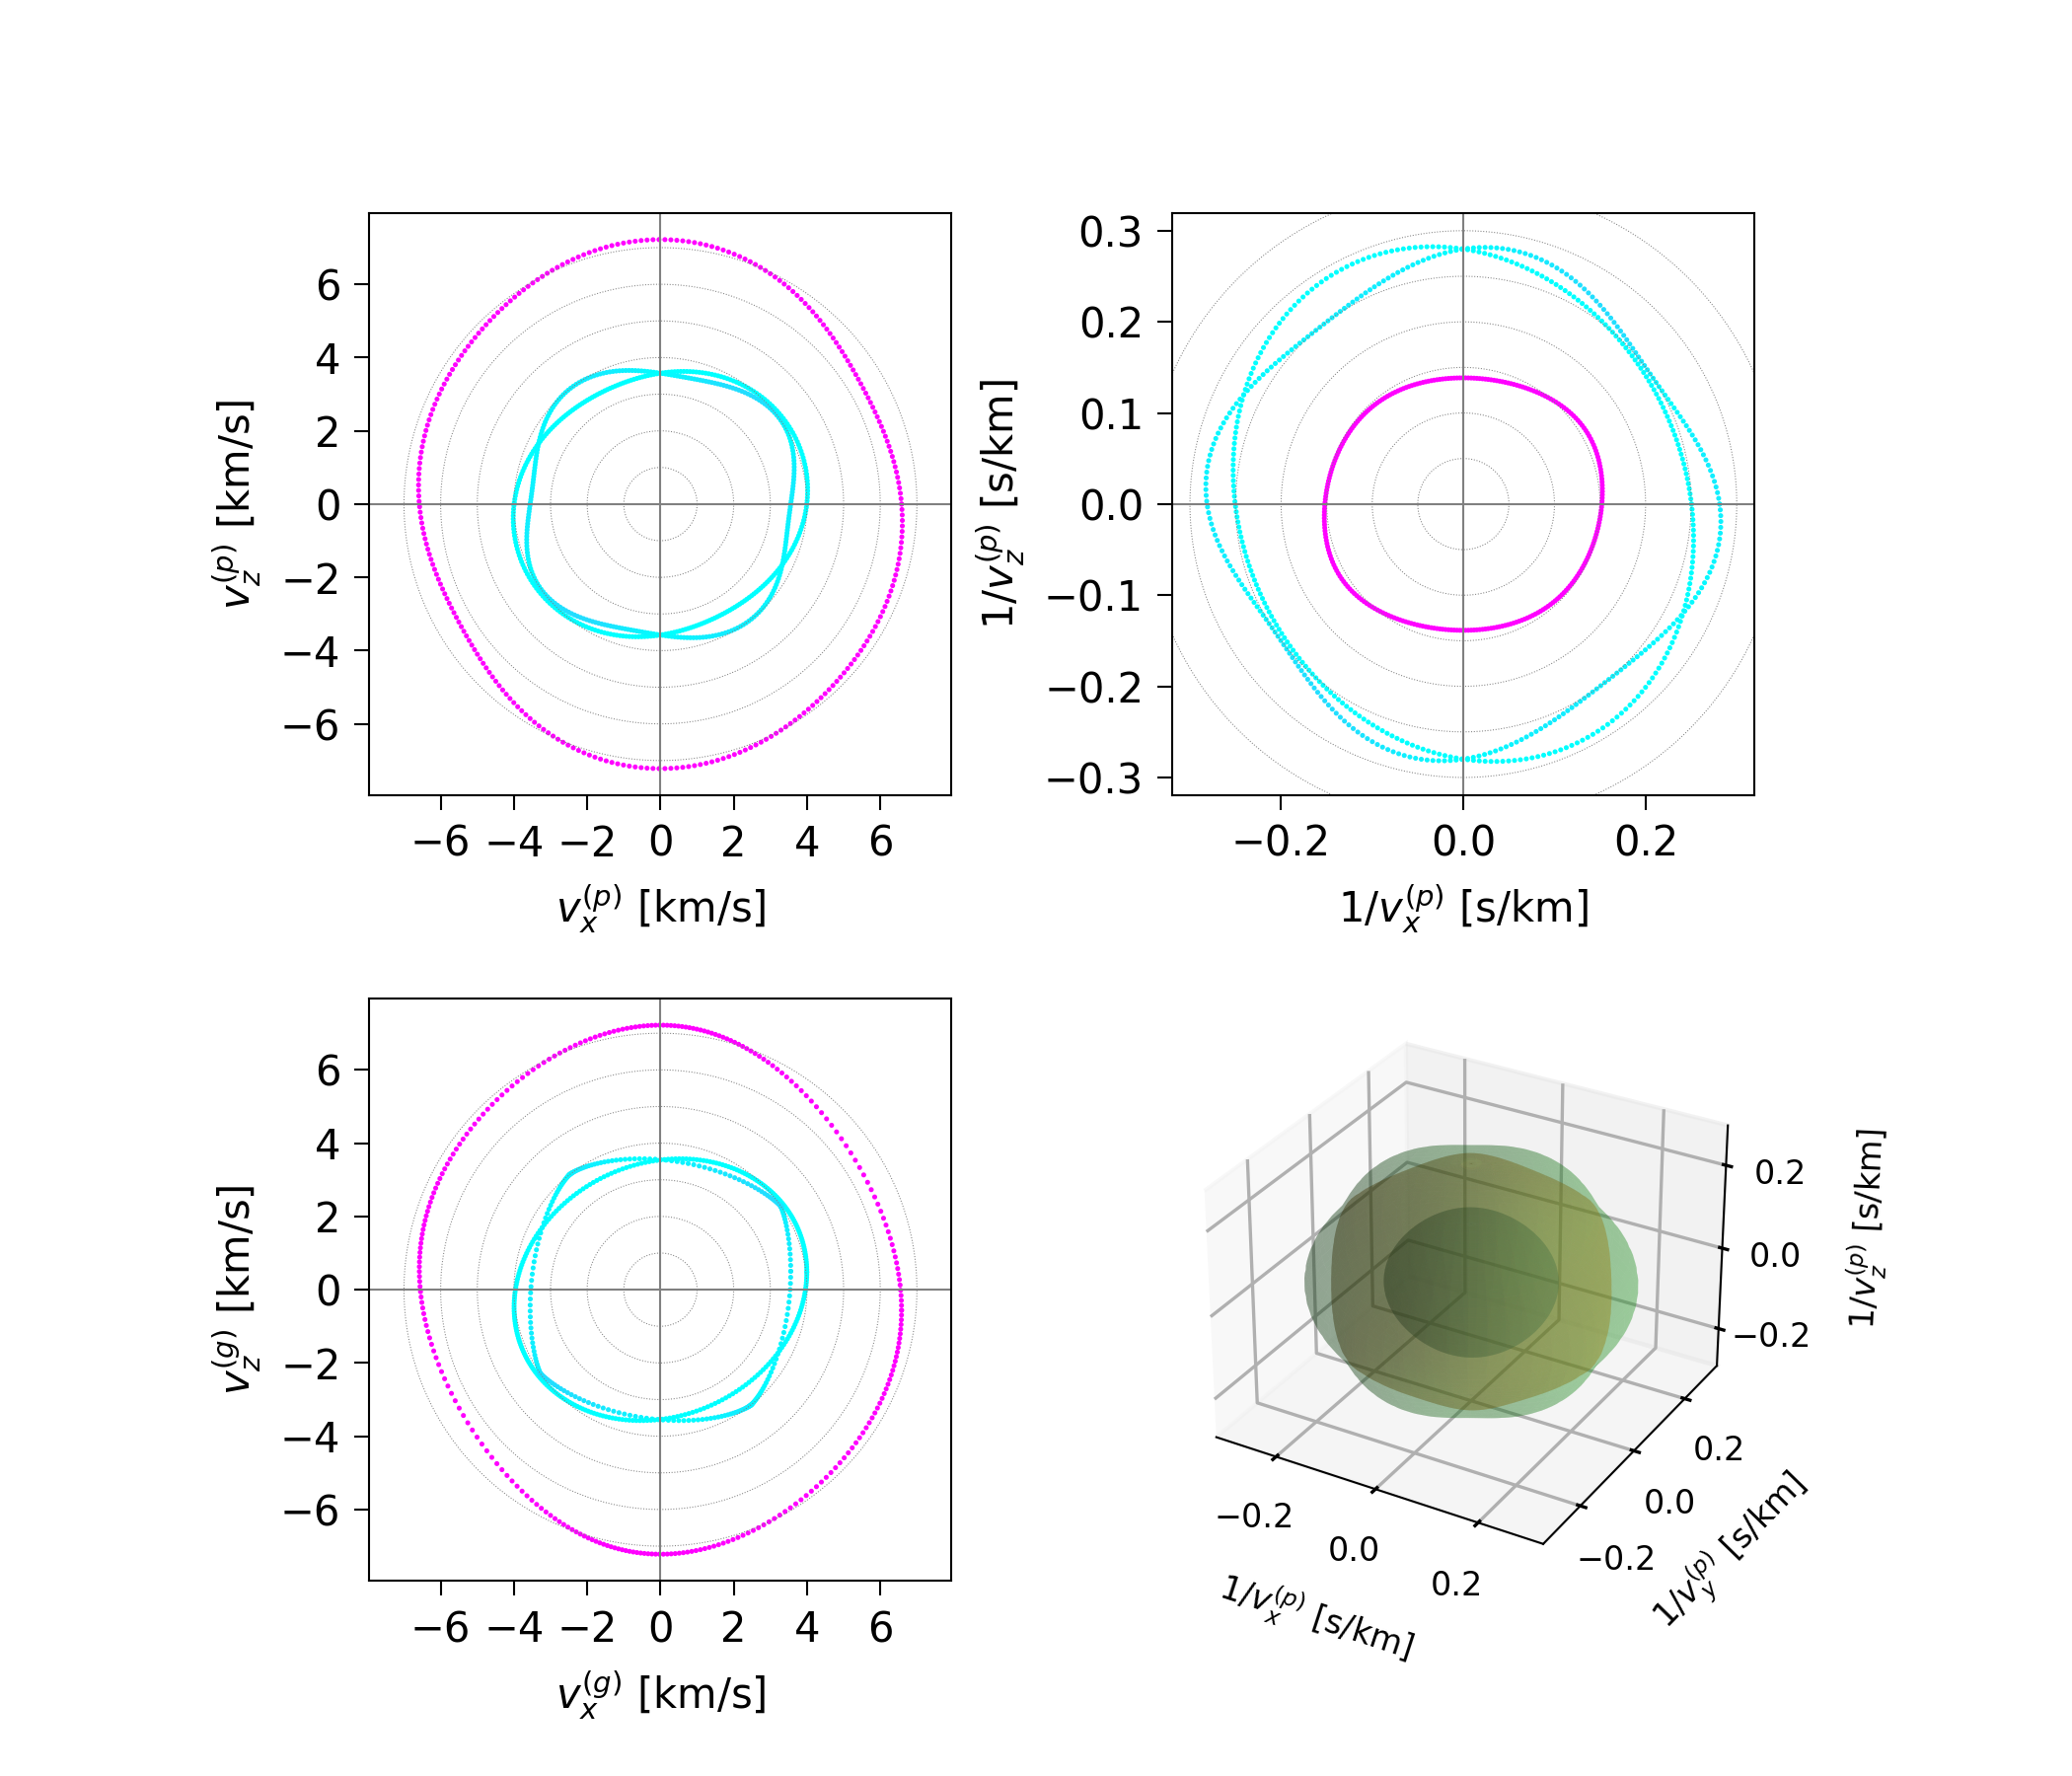

In [168]:
mat_LiNbO3_x.disable_piezoelectric_effects()
imgoff1 = mat_LiNbO3_x.plot_bulk_dispersion("tmp_xcut_piezo_off", show_poln=False)

mat_LiNbO3_negx.disable_piezoelectric_effects()
imgoff2 = mat_LiNbO3_negx.plot_bulk_dispersion("tmp_negxcut_piezo_off", show_poln=False)

display(Image(imgoff1, width=500),Image(imgoff2, width=500))

This should give Auld Fig. 8.11.

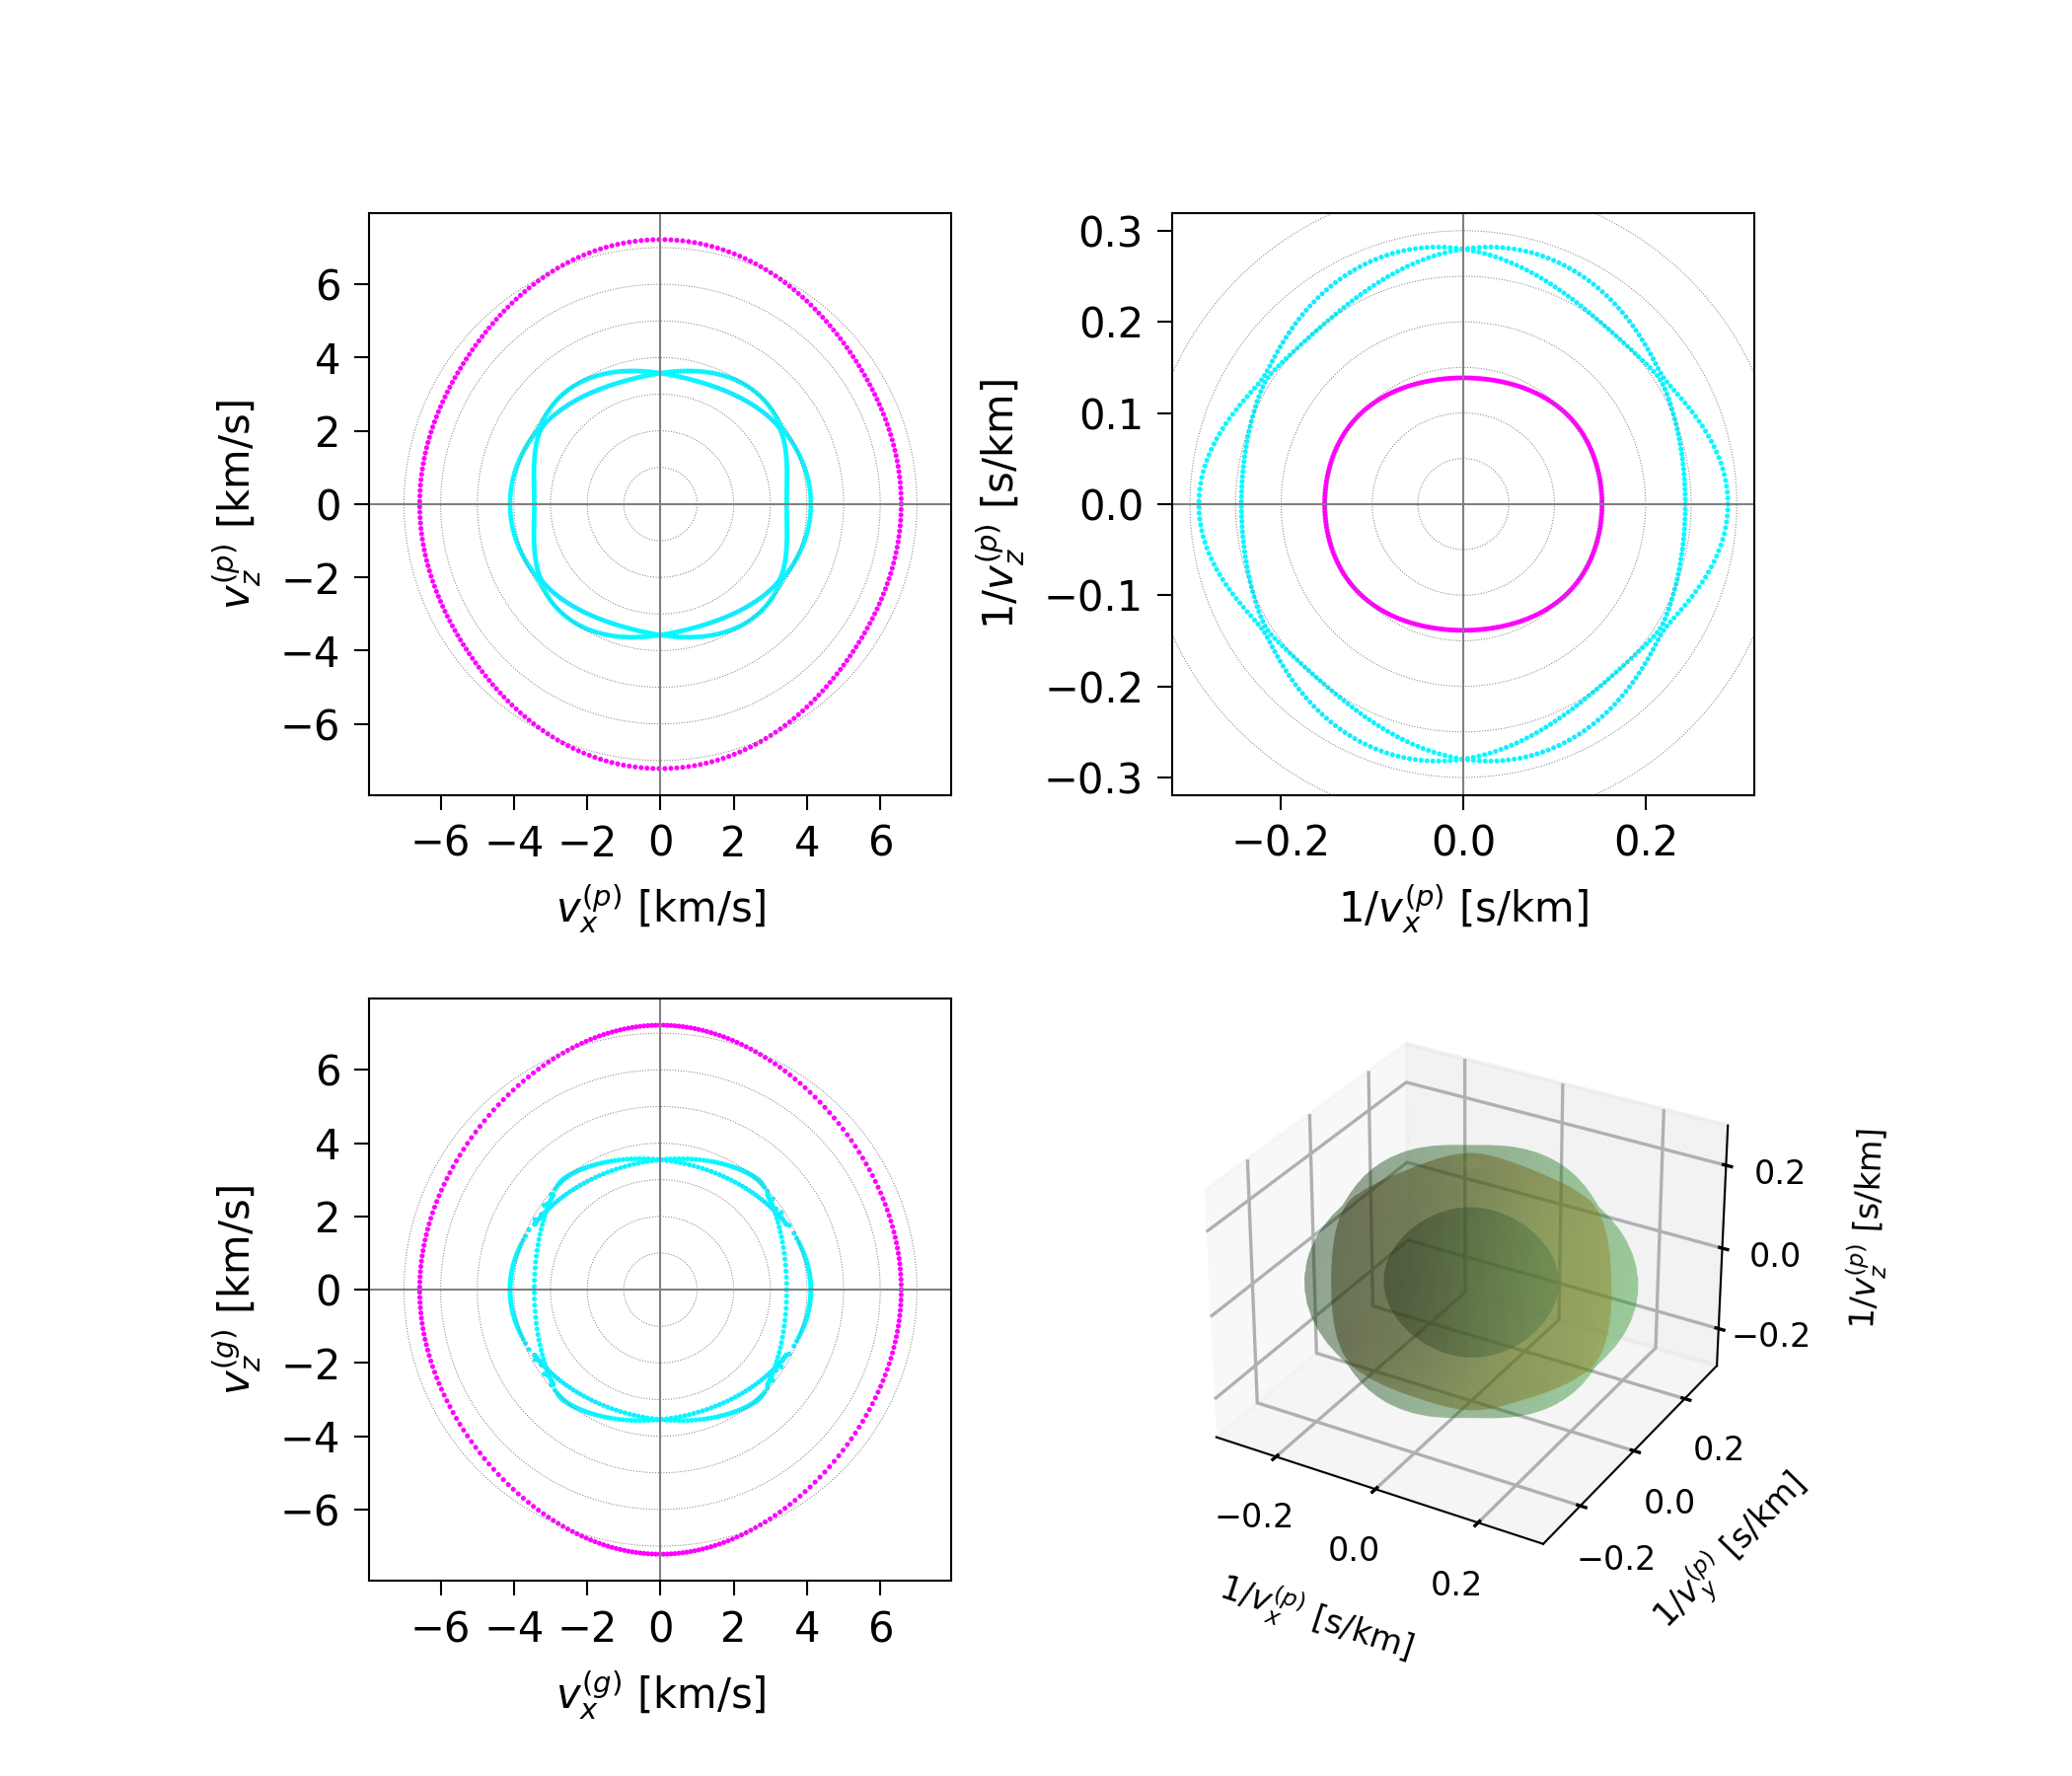

In [ ]:
mat_LiNbO3_negx.enable_piezoelectric_effects()
imgon = mat_LiNbO3_negx.plot_bulk_dispersion("tmp_negxcut_piezo_on", show_poln=False)
display(Image(imgon, width=500))

This should give Auld Fig. 8.12.

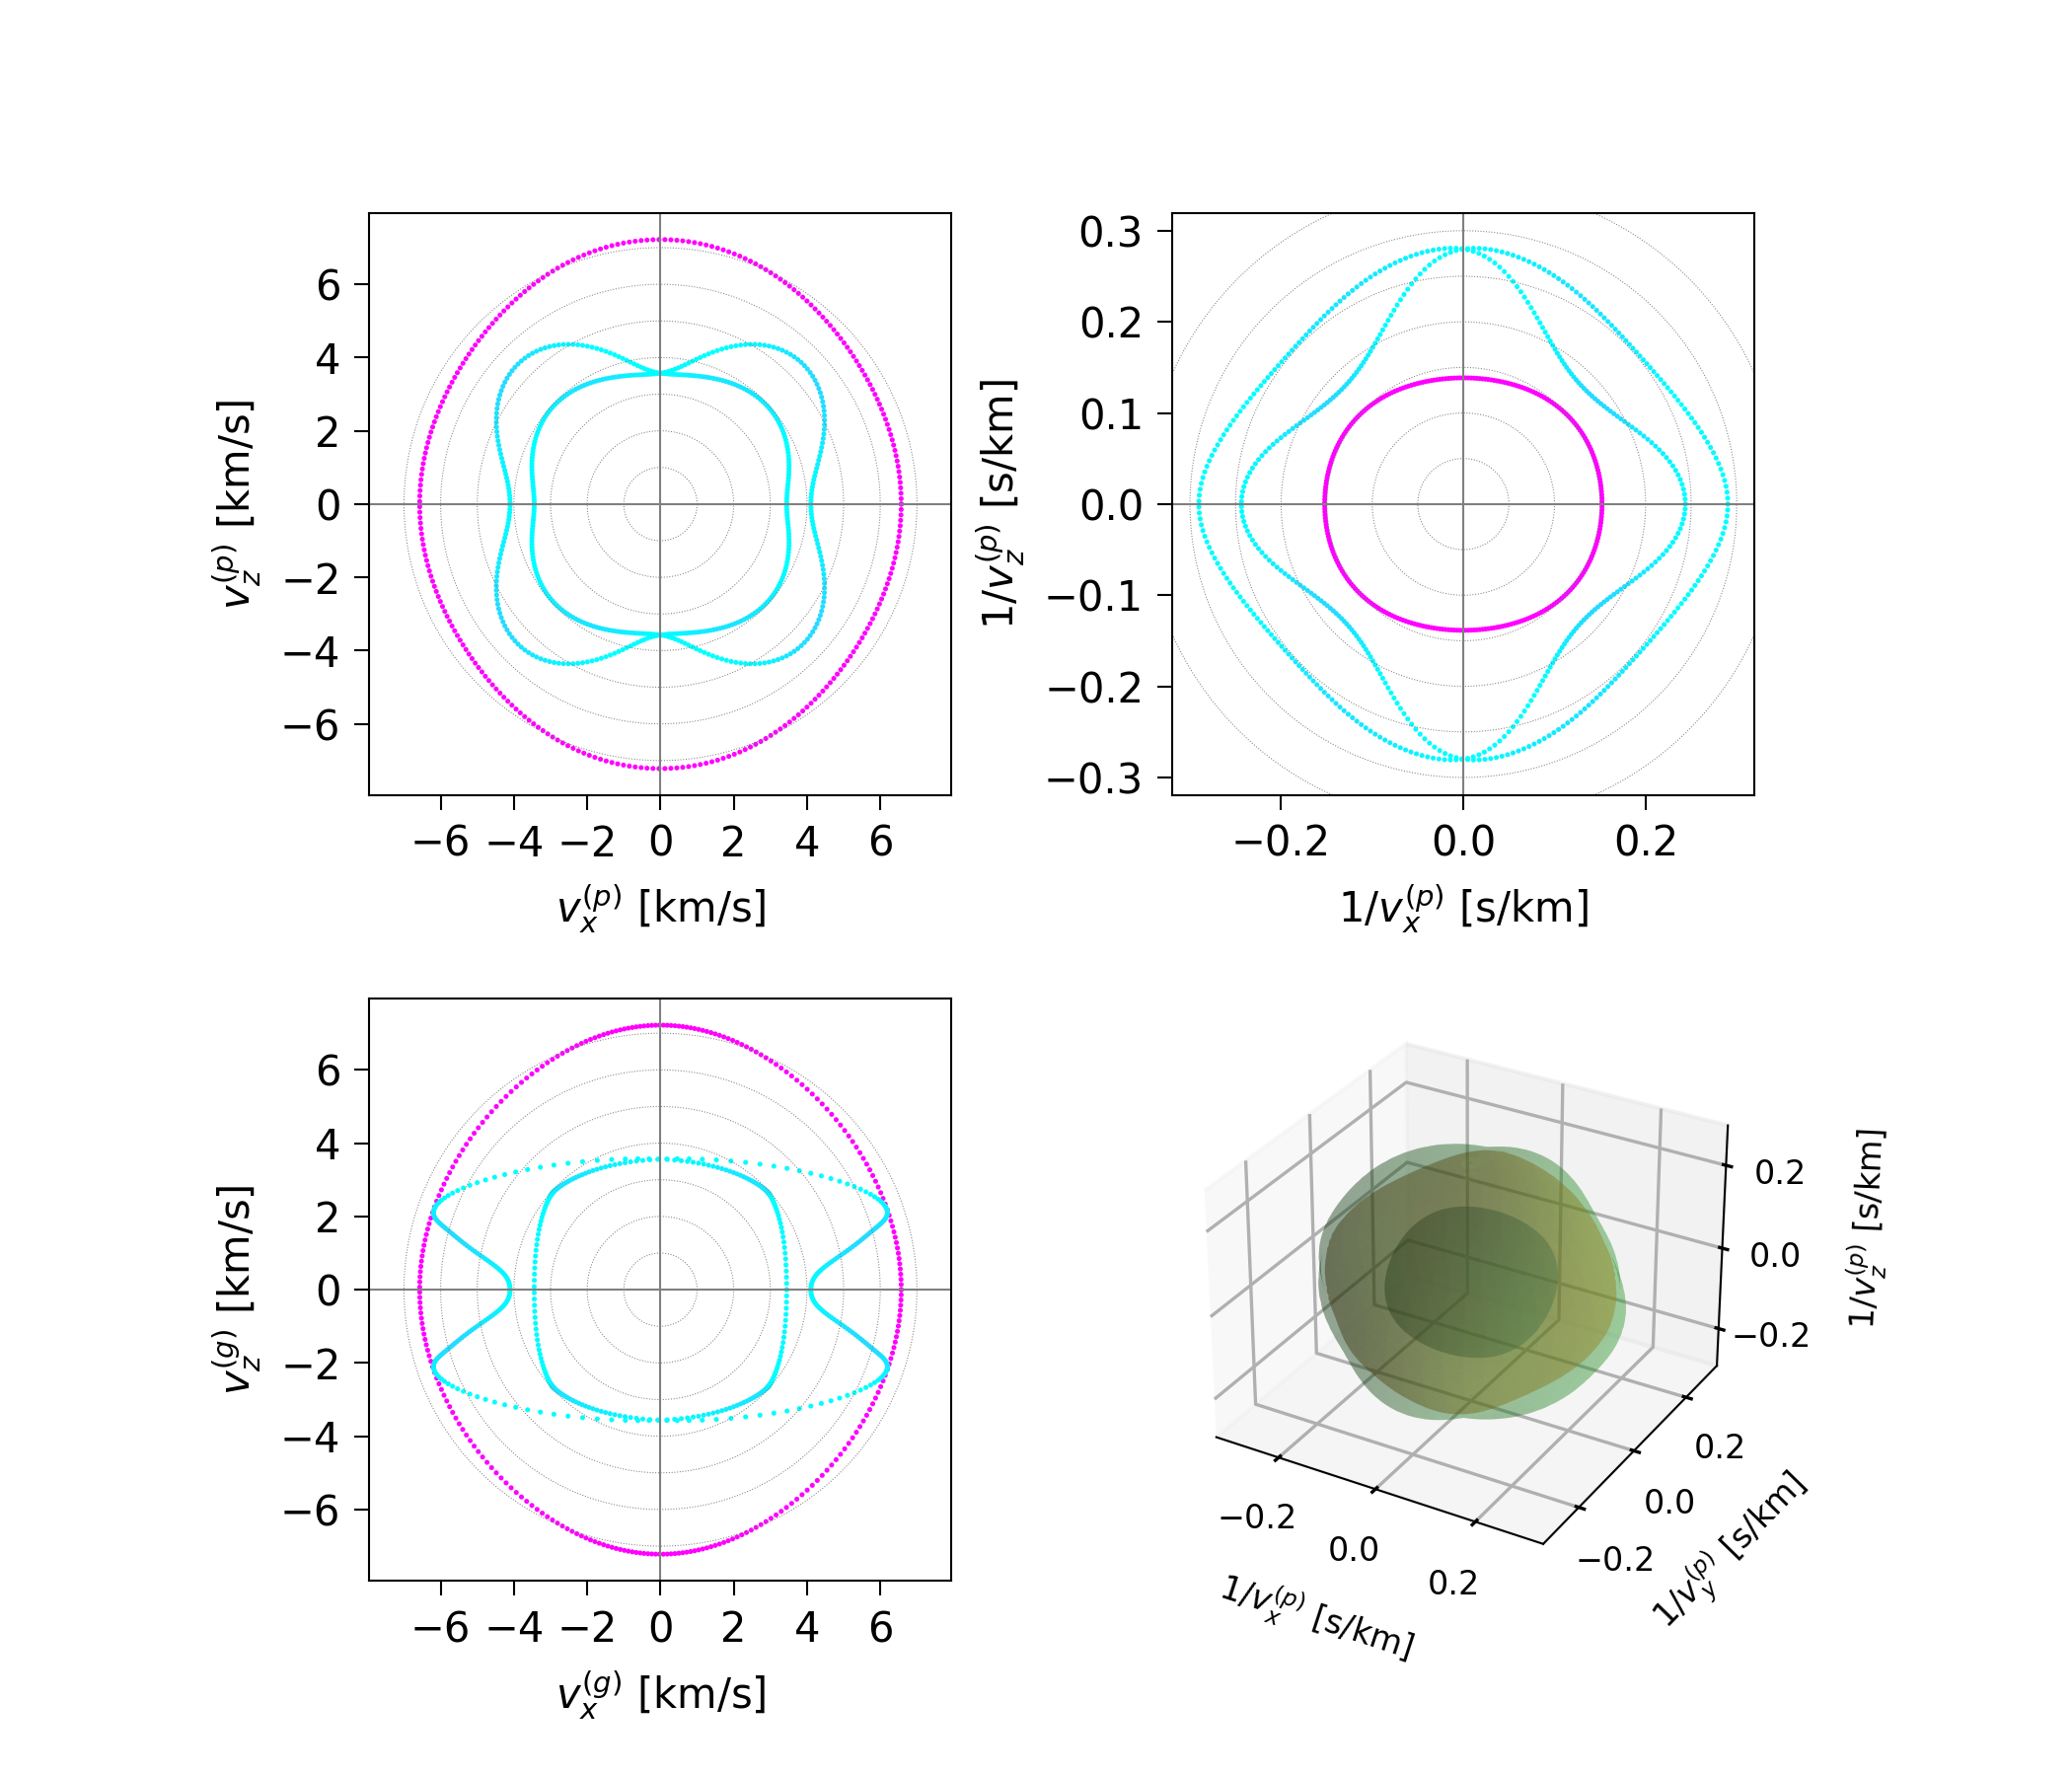

In [191]:
mat_LiNbO3_z = mat_LiNbO3.copy()
mat_LiNbO3_z.set_orientation('z-cut')

mat_LiNbO3_z.enable_piezoelectric_effects()
imgon = mat_LiNbO3_z.plot_bulk_dispersion("tmp_negxcut_piezo_on", show_poln=False)
display(Image(imgon, width=500))

# Other material comparisons

Cubic material: GaAs

In [171]:
mat_GaAs = materials.make_material("GaAs_1970_Auld")

The slowness plot (top-right) below reproduces Fig. 7.2 of Auld vol. 1, while
the ray surface plot (lower-left) reproduces Fig. 7.9.

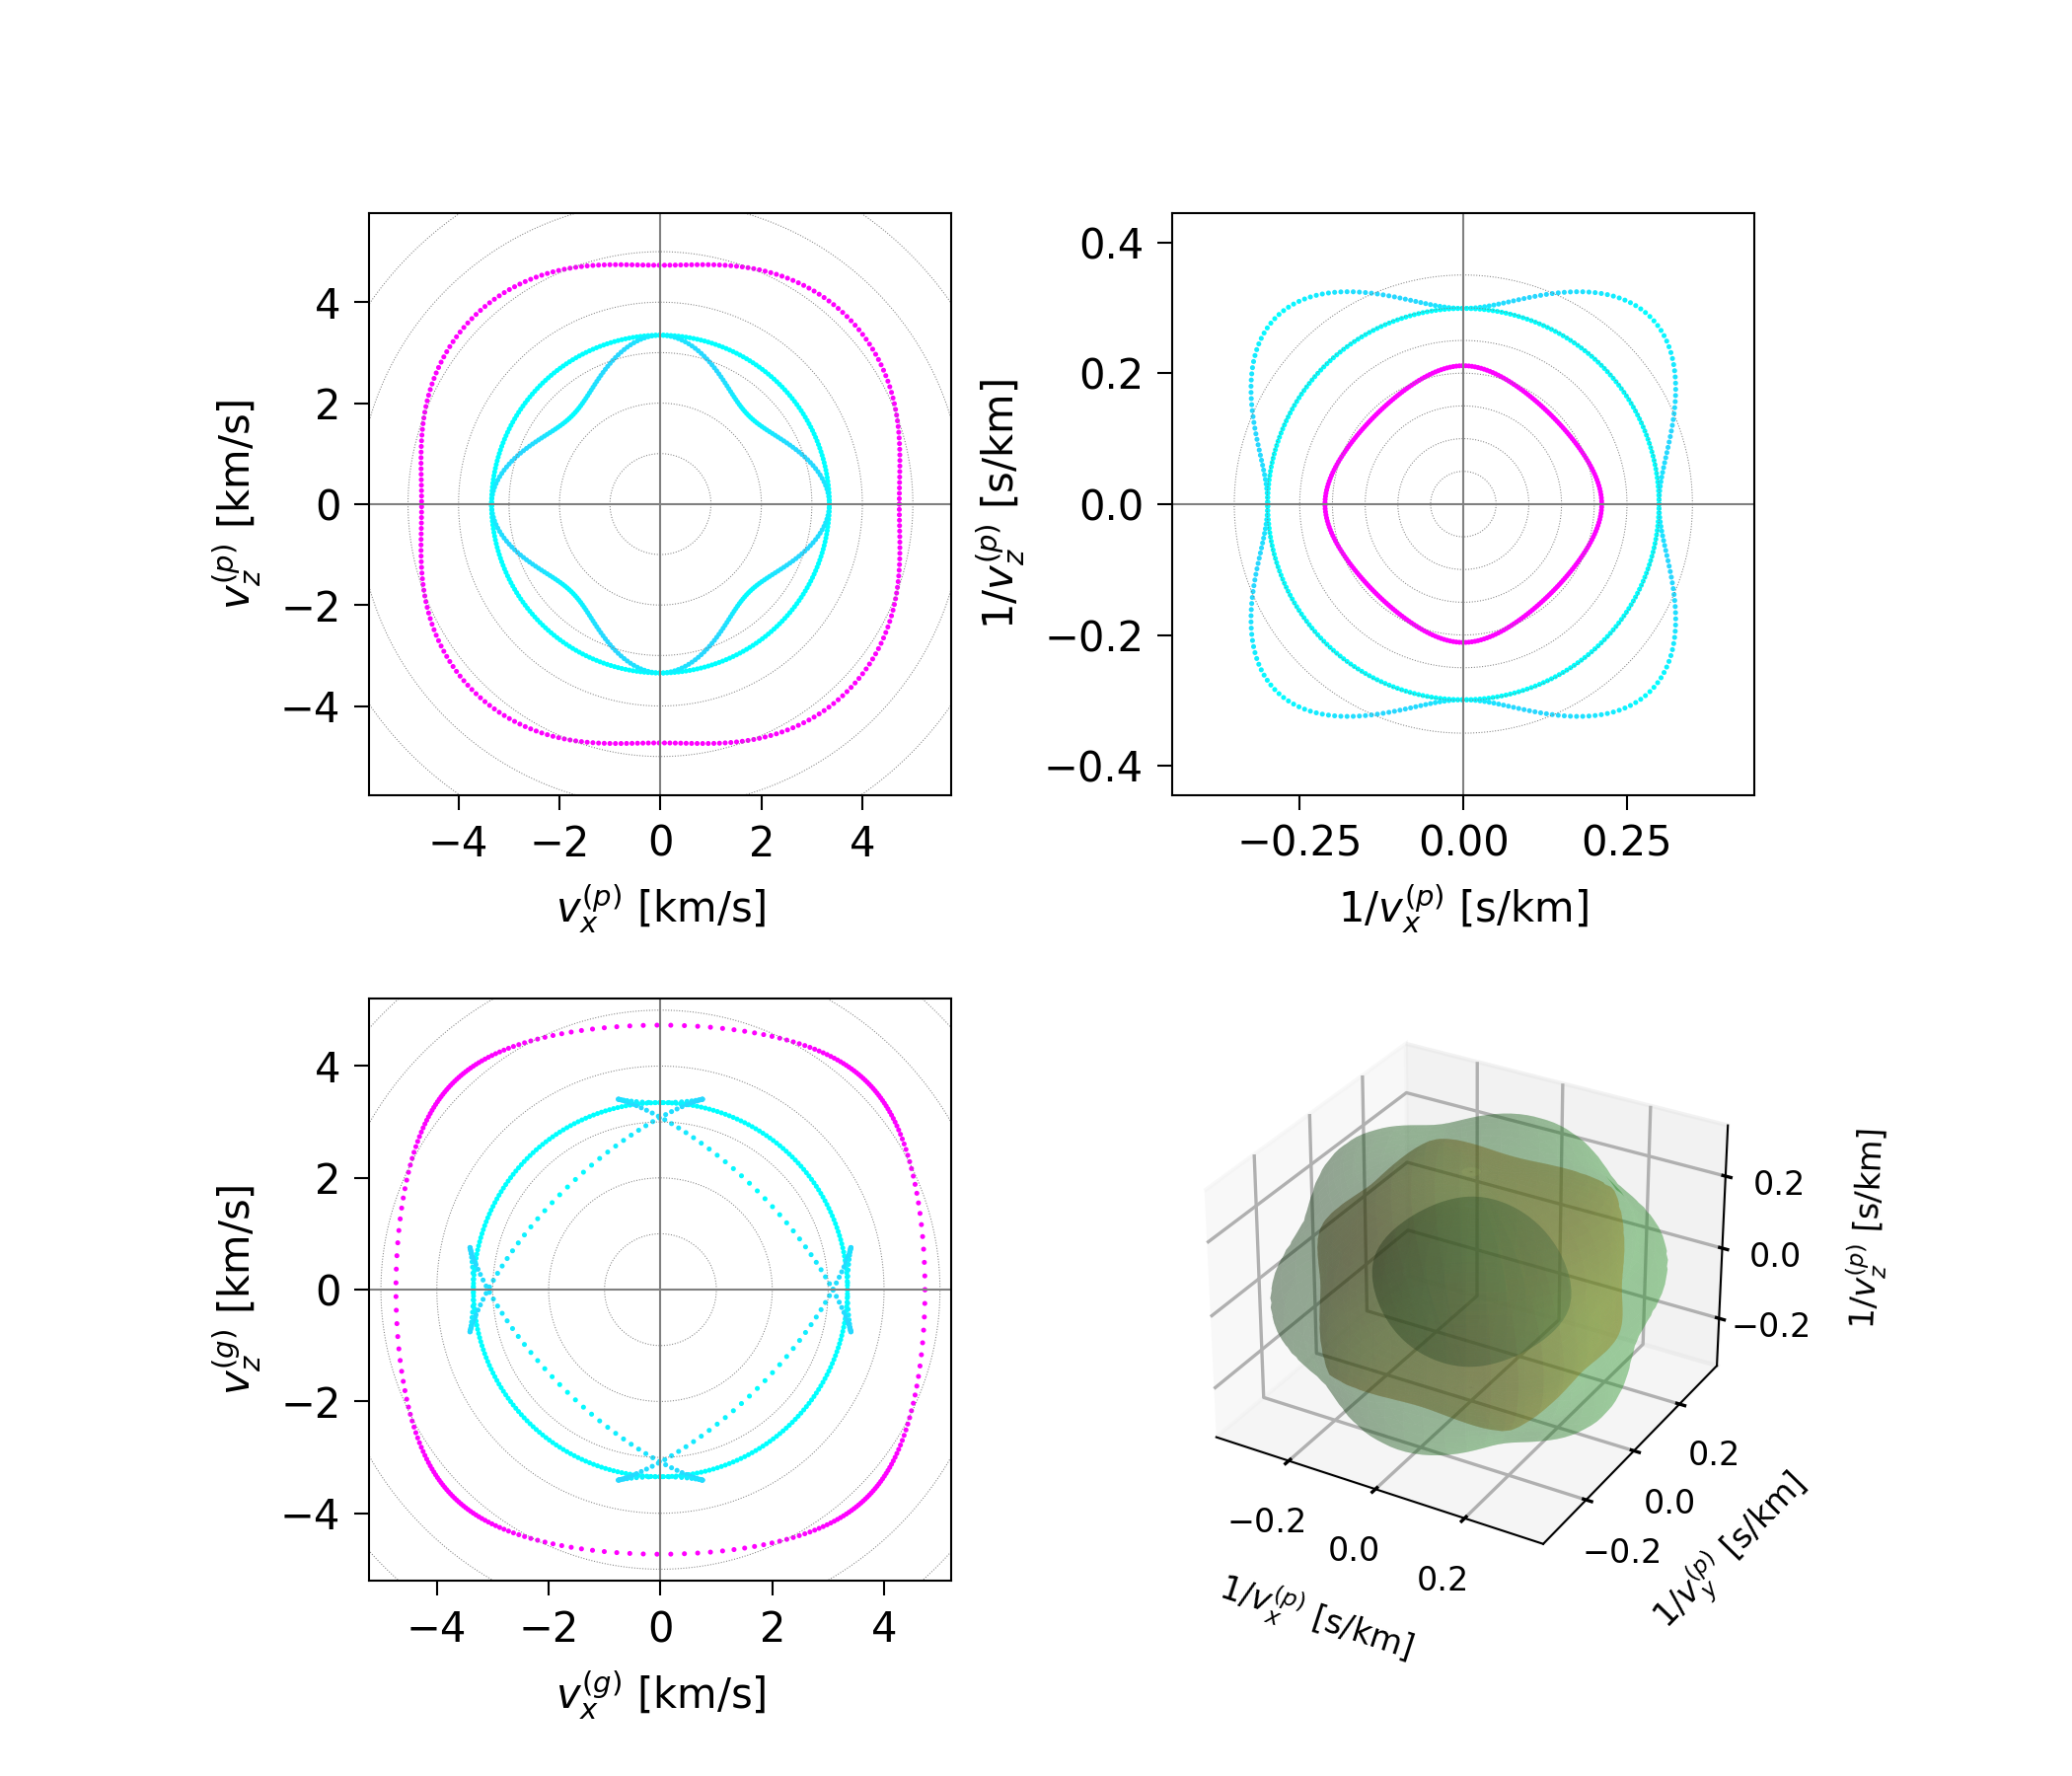

In [172]:
mat_GaAs.disable_piezoelectric_effects()

fimg = mat_GaAs.plot_bulk_dispersion("tmp_defcut", show_poln=False)
display(Image(fimg, width=500))

Now let's reproduce Fig. 7.34.
To preserve the $z$ axis, rotate $[1,-1,0]$ into the $x$ axis and $[1,-1,1]$ into the horizontal plane, 
we need a $\pi/4$ rotation around $z$: 

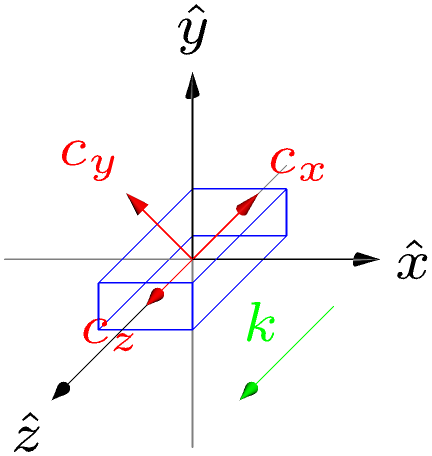

In [173]:
mat_rot = mat_GaAs.copy()
mat_rot.rotate([0,0,1], np.pi/4)
fimg = mat_rot.make_crystal_axes_plot('ttx')
display(Image(fimg, width=300))

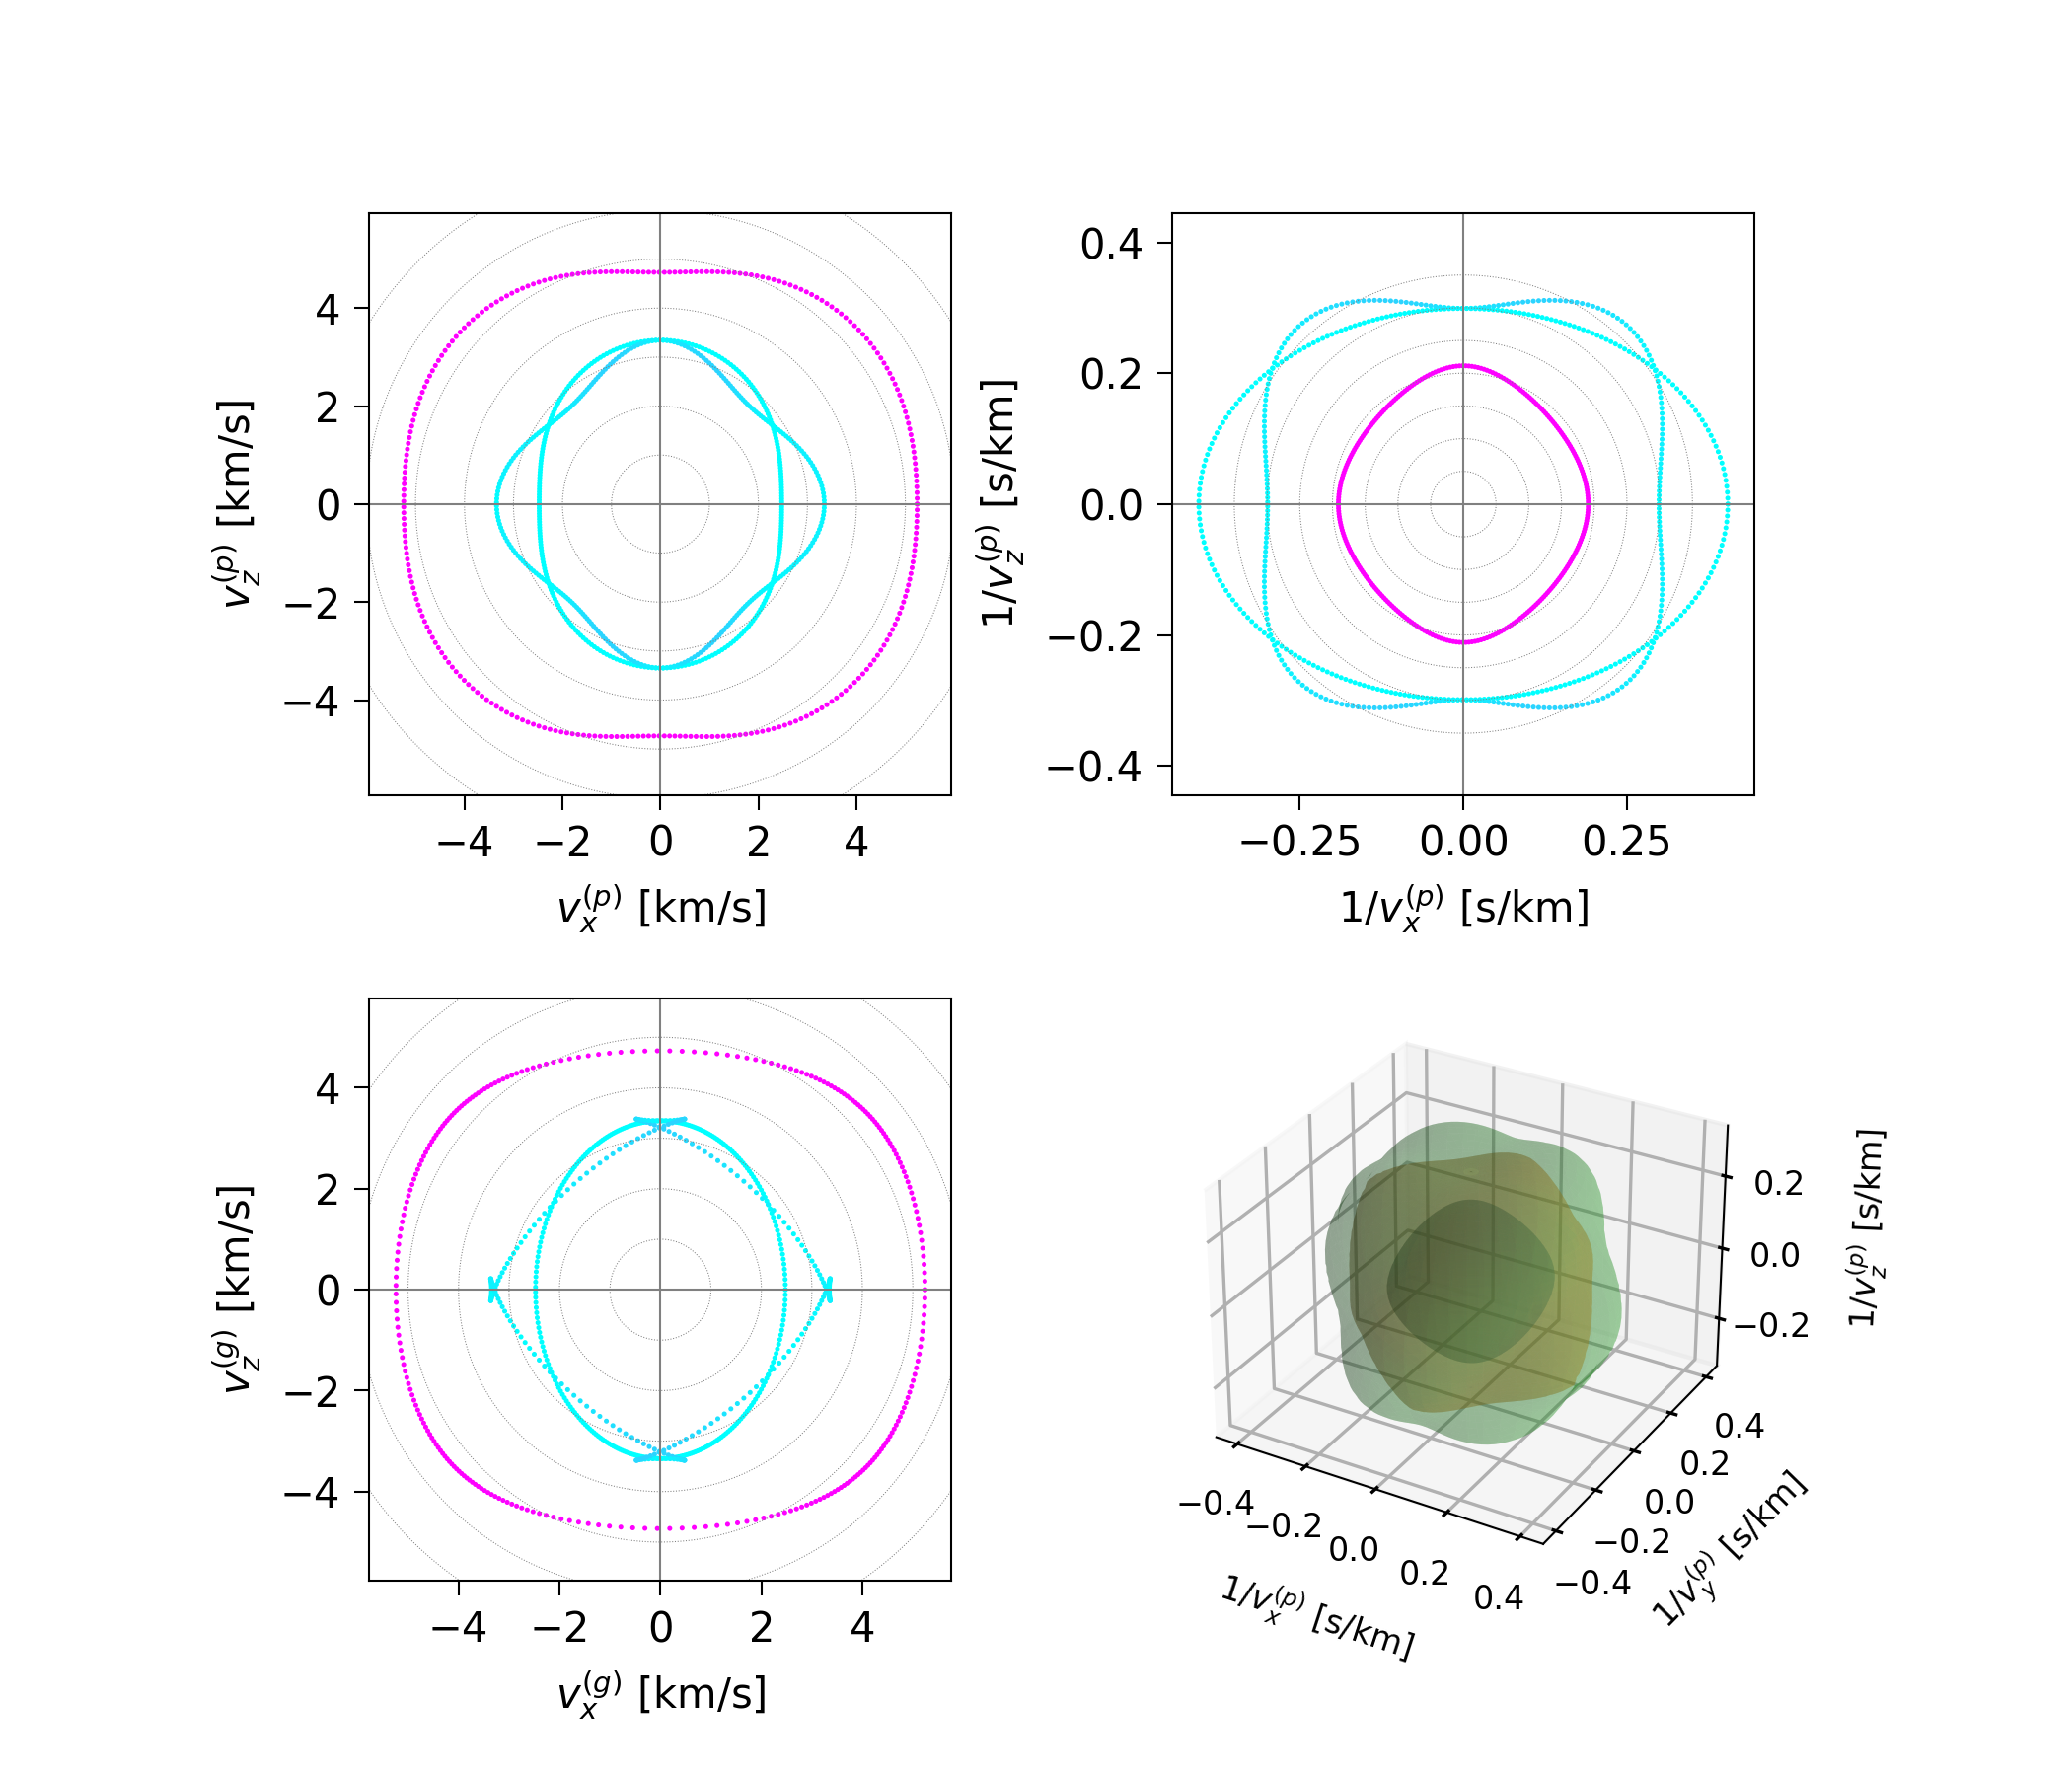

In [174]:
fimg = mat_rot.plot_bulk_dispersion("tmp_defcut", show_poln=False)
display(Image(fimg, width=800))

Hexagonal material: Cadmium sulfide

In [185]:
mat_CdS = materials.make_material("CdS_1973_Auld")
mat_CdS.set_orientation('z-cut')
#print(mat_CdS.full_str())

We rotate to the $z$-cut orientation to get a dispersion cut through the horizontal symmetry plane.

The slowness curve (top-right) then reproduces Auld Fig. 7.6.

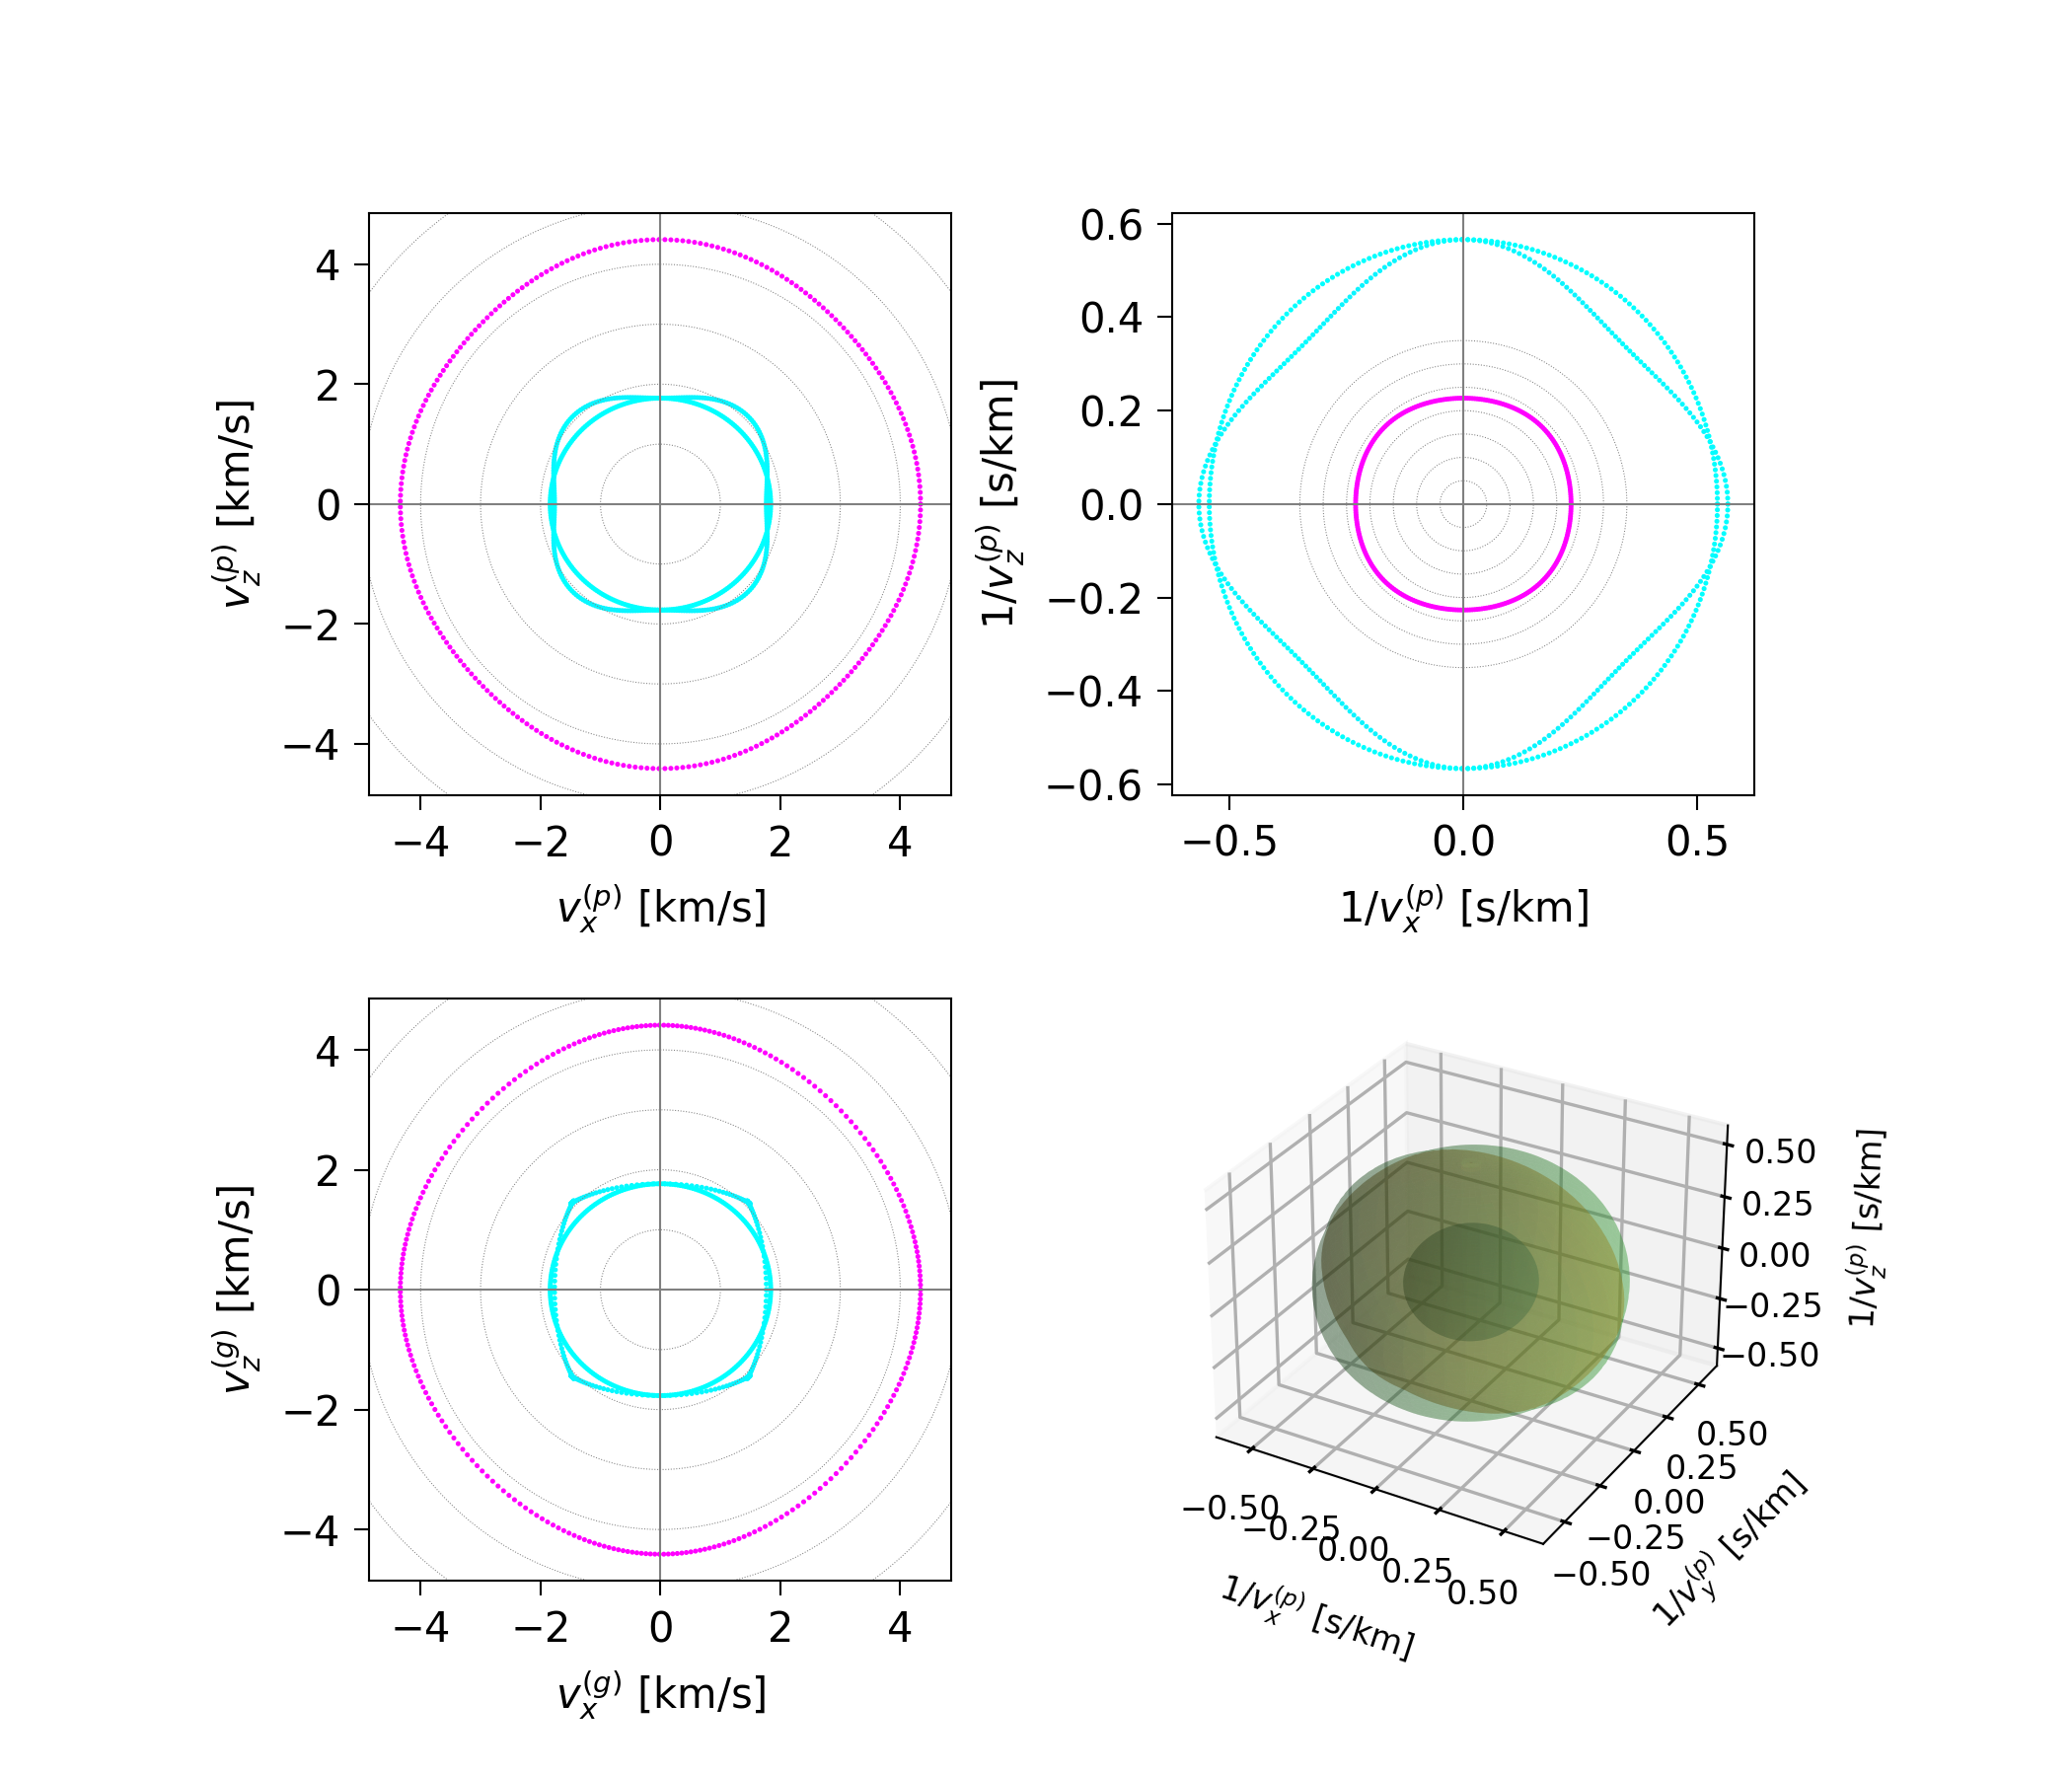

In [187]:
mat_CdS.set_orientation('z-cut')
fimg = mat_CdS.plot_bulk_dispersion("tmp_defcut", show_poln=False)
display(Image(fimg, width=600))